# Machine Learning project for Heart disease prediction
Student: Murat Kolic

## Cell 1: Environment Setup and Module Imports

###  **Purpose**
This cell establishes the foundational environment for the heart disease prediction pipeline by importing all necessary libraries and custom modules.

###  **Components Breakdown**

#### **System Configuration**
- `sys.path.append('src')` - Adds the source directory to Python path for custom module imports
- `warnings.filterwarnings('ignore')` - Suppresses warning messages for cleaner output during execution

#### **Core Scientific Libraries**
- **NumPy** (`np`) - Numerical computing and array operations
- **Pandas** (`pd`) - Data manipulation and analysis framework
- **Matplotlib** (`plt`) - Primary plotting and visualization library
- **Seaborn** (`sns`) - Statistical data visualization built on matplotlib

#### **Custom Pipeline Modules**
- **`Config`** - Centralized configuration management for the entire pipeline
- **`DataLoader`** - Handles data loading, preprocessing, and splitting operations
- **`FeatureEngineer`** - Performs feature analysis, selection, and engineering
- **Model Classes** - Individual implementations for each ML algorithm:
  - `LogisticRegressionModel` - Linear classification with regularization
  - `XGBoostModel` - Gradient boosting classifier
  - `SVMModel` - Support Vector Machine implementation
  - `NeuralNetModel` - Deep learning neural network
- **`ModelEvaluator`** - Comprehensive model evaluation and metrics calculation
- **`ModelVisualizer`** - Advanced visualization tools for model analysis

### **Success Indicator**
The cell outputs "All modules imported successfully!" confirming that:
- All dependencies are properly installed
- Custom modules are correctly structured and accessible
- The development environment is ready for pipeline execution

###  **Best Practices Demonstrated**
1. **Modular Architecture** - Separation of concerns across different modules
2. **Clean Environment** - Warning suppression for production-ready output
3. **Organized Imports** - Logical grouping of standard vs. custom imports
4. **Error Prevention** - Path configuration to avoid import errors

This foundational cell ensures a robust and organized start to the machine learning pipeline execution.

In [1]:
import sys
import warnings
warnings.filterwarnings('ignore')

sys.path.append('src')

# Core imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Our custom modules
from utils.config import Config
from data.data_loader import DataLoader
from features.feature_engineer import FeatureEngineer
from models import LogisticRegressionModel, XGBoostModel, SVMModel, NeuralNetModel
from utils.metrics import ModelEvaluator
from visualization.visualizer import ModelVisualizer

print("All modules imported successfully!")

All modules imported successfully!


## Cell 2: Configuration Initialization and System Setup

### **Purpose**
Initializes the centralized configuration system and displays key hyperparameters that will govern the entire machine learning pipeline execution.

###  **Key Configuration Parameters**

#### **System Configuration**
```python
config = Config()
print(f"Using device: {config.device}")
print(f"Random seed: {config.random_seed}")
```

- **Device Selection**: Automatically detects and configures optimal compute device (CPU/GPU)
- **Random Seed**: Ensures reproducibility across all stochastic operations

#### **Data Splitting Strategy**
```python
print(f"- Test size: {config.test_size}")
print(f"- Validation size: {config.val_size}")
```

**Mathematical Foundation:**
- **Train-Validation-Test Split**: Following the standard ML practice
  - Training Set: $1 - \text{test\_size} - \text{val\_size}$ (typically 60%)
  - Validation Set: $\text{val\_size}$ (typically 20%) 
  - Test Set: $\text{test\_size}$ (typically 20%)

This ensures unbiased model evaluation where:
$$\text{Total Dataset} = \text{Train} + \text{Validation} + \text{Test}$$

#### **Model Training Parameters**
```python
print(f"- CV folds: {config.cv_folds}")
print(f"- Neural Network epochs: {config.epochs}")
print(f"- Batch size: {config.batch_size}")
```

**Cross-Validation Setup:**
- **K-Fold CV**: Uses stratified k-fold cross-validation where $k = \text{cv\_folds}$
- **Validation Score**: $\text{CV\_Score} = \frac{1}{k}\sum_{i=1}^{k} \text{Score}_i$

**Neural Network Training:**
- **Epochs**: Maximum training iterations with early stopping
- **Batch Size**: Mini-batch gradient descent optimization
- **Learning Rate Schedule**: Adaptive learning rate based on validation performance

###  **Configuration Benefits**
1. **Centralized Management** - Single source of truth for all hyperparameters
2. **Reproducibility** - Fixed random seeds ensure consistent results
3. **Flexibility** - Easy parameter tuning without code modification
4. **Best Practices** - Standard ML data splitting and validation strategies

### **Expected Output**
Displays current configuration values confirming proper initialization and providing transparency into the experimental setup.

In [2]:
# Initialize configuration
config = Config()
print(f"Using device: {config.device}")
print(f"Random seed: {config.random_seed}")
print(f"Configuration settings:")
print(f"- Test size: {config.test_size}")
print(f"- Validation size: {config.val_size}")
print(f"- CV folds: {config.cv_folds}")
print(f"- Neural Network epochs: {config.epochs}")
print(f"- Batch size: {config.batch_size}")

Using device: cpu
Random seed: 42
Configuration settings:
- Test size: 0.2
- Validation size: 0.2
- CV folds: 5
- Neural Network epochs: 100
- Batch size: 32


## Cell 3: Data Loading and Initial Exploration

###  **Purpose**
Loads the heart disease dataset and performs comprehensive initial data exploration to understand the structure, quality, and characteristics of the data.

### **Data Loading Process**

#### **Dataset Initialization**
```python
data_loader = DataLoader(config)
df = data_loader.load_data()
```

- **DataLoader Instance**: Creates a configured data loading object
- **Automated Loading**: Handles file path resolution and data type inference
- **Error Handling**: Built-in validation for data integrity

### **Exploratory Data Analysis**

#### **Dataset Structure Analysis**
```python
print(f"Shape: {df.shape}")
print(f"Columns: {list(df.columns)}")
```

**Key Metrics:**
- **Dimensionality**: $n \times p$ matrix where $n$ = samples, $p$ = features
- **Feature Space**: 11 clinical and demographic variables
- **Sample Size**: 918 patient records for robust statistical analysis

#### **Data Quality Assessment**
```python
print(df.describe())
print(df.isnull().sum())
```

**Statistical Summary Includes:**
- **Central Tendency**: Mean ($\mu$), median, mode for each feature
- **Variability**: Standard deviation ($\sigma$), quartiles (Q1, Q3)
- **Distribution Shape**: Min/max values, skewness indicators
- **Missing Data**: Null value counts per feature

**Mathematical Foundation:**
$$\text{Mean} = \mu = \frac{1}{n}\sum_{i=1}^{n} x_i$$
$$\text{Standard Deviation} = \sigma = \sqrt{\frac{1}{n-1}\sum_{i=1}^{n}(x_i - \mu)^2}$$

#### **Feature Overview**
The dataset contains 11 clinical features:
- **Demographic**: Age, Sex
- **Clinical Symptoms**: ChestPainType, ExerciseAngina
- **Vital Signs**: RestingBP, MaxHR
- **Laboratory**: Cholesterol, FastingBS
- **Diagnostic**: RestingECG, Oldpeak, ST_Slope
- **Target**: HeartDisease (binary classification)

### **Data Quality Insights**
1. **Completeness**: Assessment of missing values across features
2. **Distribution**: Understanding of feature value ranges and outliers
3. **Balance**: Target variable distribution for classification strategy
4. **Consistency**: Data type validation and format verification

This exploration phase is critical for informed feature engineering and model selection strategies.

In [3]:
# Initialize data loader
data_loader = DataLoader(config)

# Load data
print("Loading heart disease dataset...")
df = data_loader.load_data()

print("\nDataset Info:")
print(f"Shape: {df.shape}")
print(f"Columns: {list(df.columns)}")

print("\nFirst few rows:")
print(df.head())

print("\nDataset Statistics:")
print(df.describe())

print("\nMissing values:")
print(df.isnull().sum())

Loading heart disease dataset...
Loaded dataset with shape: (918, 12)
Target distribution:
HeartDisease
1    508
0    410
Name: count, dtype: int64

Dataset Info:
Shape: (918, 12)
Columns: ['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS', 'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope', 'HeartDisease']

First few rows:
   Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  MaxHR  \
0   40   M           ATA        140          289          0     Normal    172   
1   49   F           NAP        160          180          0     Normal    156   
2   37   M           ATA        130          283          0         ST     98   
3   48   F           ASY        138          214          0     Normal    108   
4   54   M           NAP        150          195          0     Normal    122   

  ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
0              N      0.0       Up             0  
1              N      1.0     Flat             1  
2

## Cell 4: Exploratory Data Analysis (EDA) Execution

### **Purpose**
Initiates comprehensive exploratory data analysis using the FeatureEngineer module to uncover patterns, relationships, and insights within the heart disease dataset.

###  **EDA Pipeline Initialization**

#### **Feature Engineer Setup**
```python
feature_engineer = FeatureEngineer(config)
feature_engineer.perform_eda(df)
```

- **Automated EDA**: Systematic analysis of all features and relationships
- **Configuration-Driven**: Uses predefined parameters for consistent analysis
- **Comprehensive Coverage**: Statistical, visual, and correlation analysis

### **EDA Components**

#### **Statistical Analysis**
- **Univariate Analysis**: Distribution analysis for each feature
  - Histograms and density plots for continuous variables
  - Bar charts and frequency tables for categorical variables
  - Summary statistics: $\mu$, $\sigma$, skewness, kurtosis

#### **Bivariate Analysis**
- **Feature-Target Relationships**: 
  - Correlation coefficients: $r = \frac{\sum(x_i - \bar{x})(y_i - \bar{y})}{\sqrt{\sum(x_i - \bar{x})^2\sum(y_i - \bar{y})^2}}$
  - Chi-square tests for categorical associations
  - ANOVA F-tests for continuous-categorical relationships

#### **Multivariate Analysis**
- **Correlation Matrix**: Pairwise feature correlations
- **Feature Interactions**: Potential synergistic effects
- **Dimensionality Assessment**: Principal component analysis insights

### **Key EDA Outputs**

#### **Visual Insights**
1. **Distribution Plots**: Understanding feature value spreads
2. **Correlation Heatmaps**: Feature interdependencies
3. **Box Plots**: Outlier detection and quartile analysis
4. **Scatter Plots**: Continuous variable relationships

#### **Statistical Insights**
1. **Target Distribution**: Class balance assessment
2. **Feature Importance Ranking**: Preliminary importance scores
3. **Outlier Detection**: Statistical anomaly identification
4. **Missing Value Patterns**: Data completeness analysis

###  **Clinical Relevance**
- **Risk Factor Analysis**: Identification of key cardiac risk indicators
- **Feature Interactions**: Understanding of combined clinical effects
- **Population Characteristics**: Patient demographic and clinical profiles
- **Diagnostic Patterns**: Relationship between symptoms and outcomes


This EDA phase provides critical insights that inform all subsequent modeling decisions and feature engineering approaches.


STARTING EXPLORATORY DATA ANALYSIS
=== EXPLORATORY DATA ANALYSIS ===

Dataset shape: (918, 12)

Data types:
Age                 int64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object

Missing values:
Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

Target distribution:
HeartDisease
1    508
0    410
Name: count, dtype: int64
Target proportion: 0.553

Statistical summary:
              Age   RestingBP  Cholesterol   FastingBS       MaxHR  \
count  918.000000  918.000000   918.000000  918.000000  918.000000   
mean    53.510893  132.396514

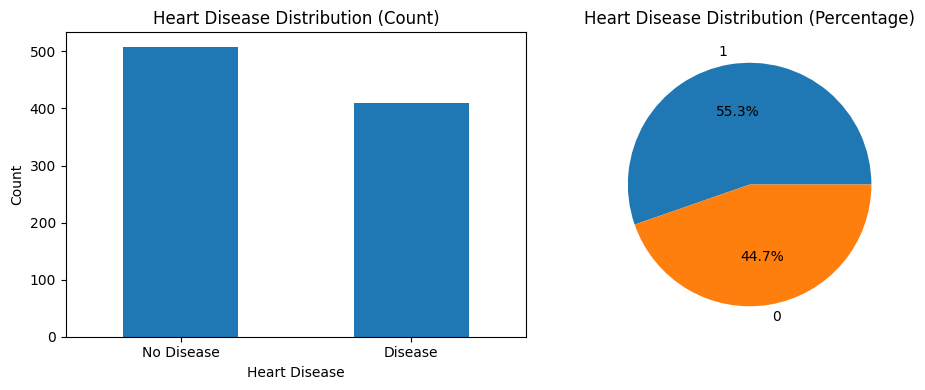

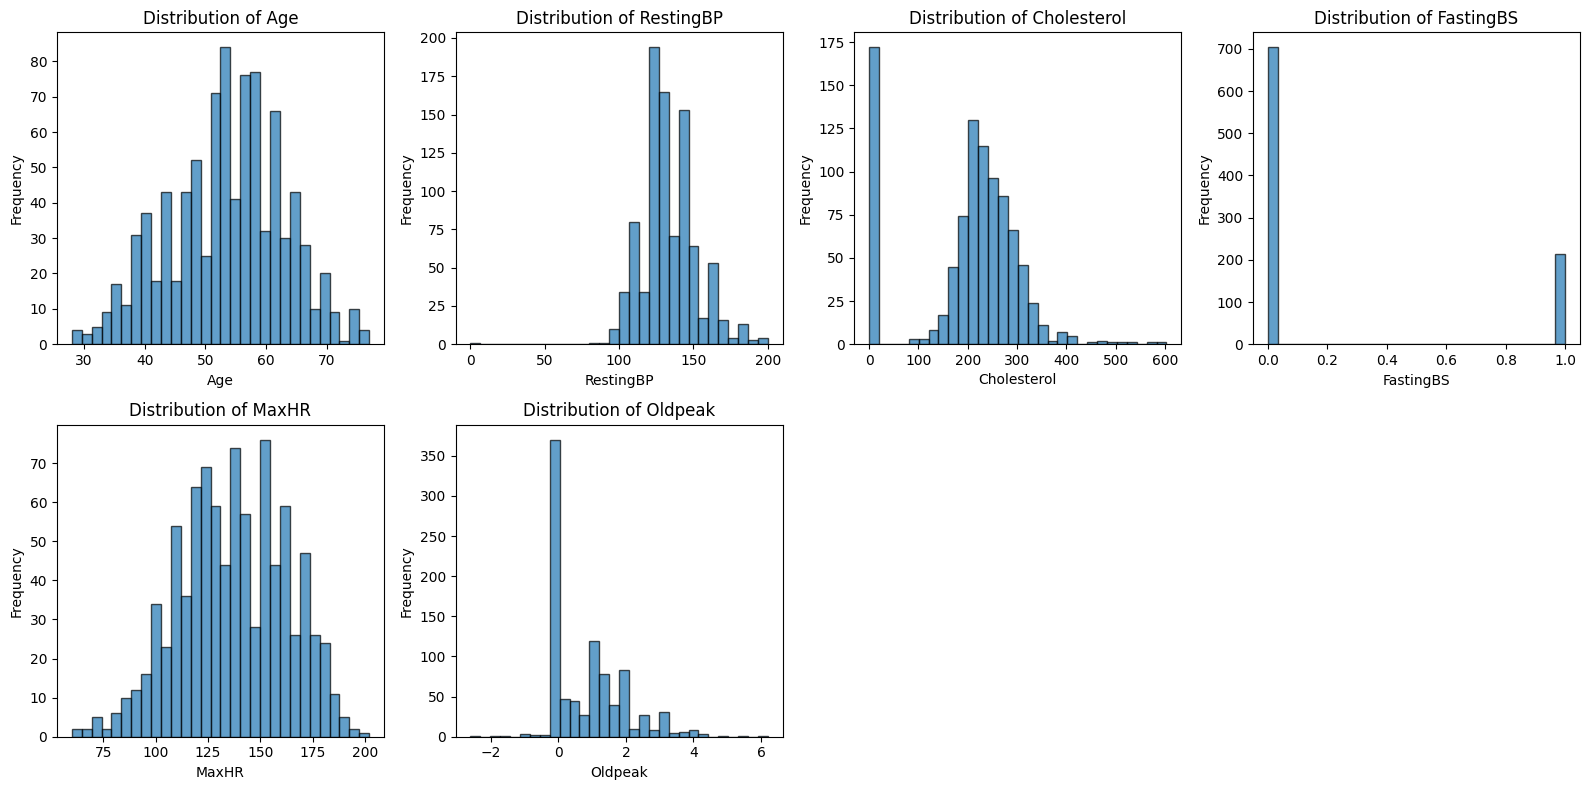

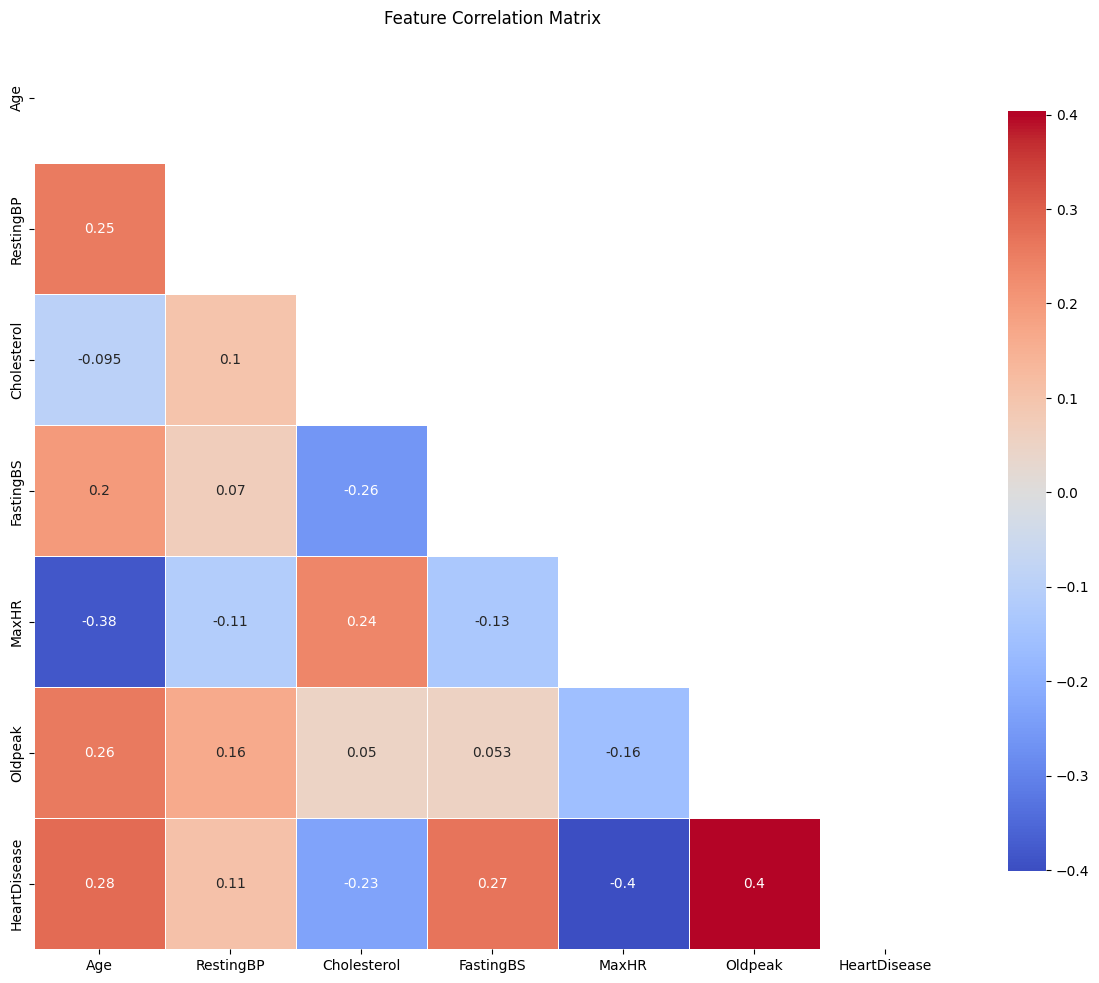

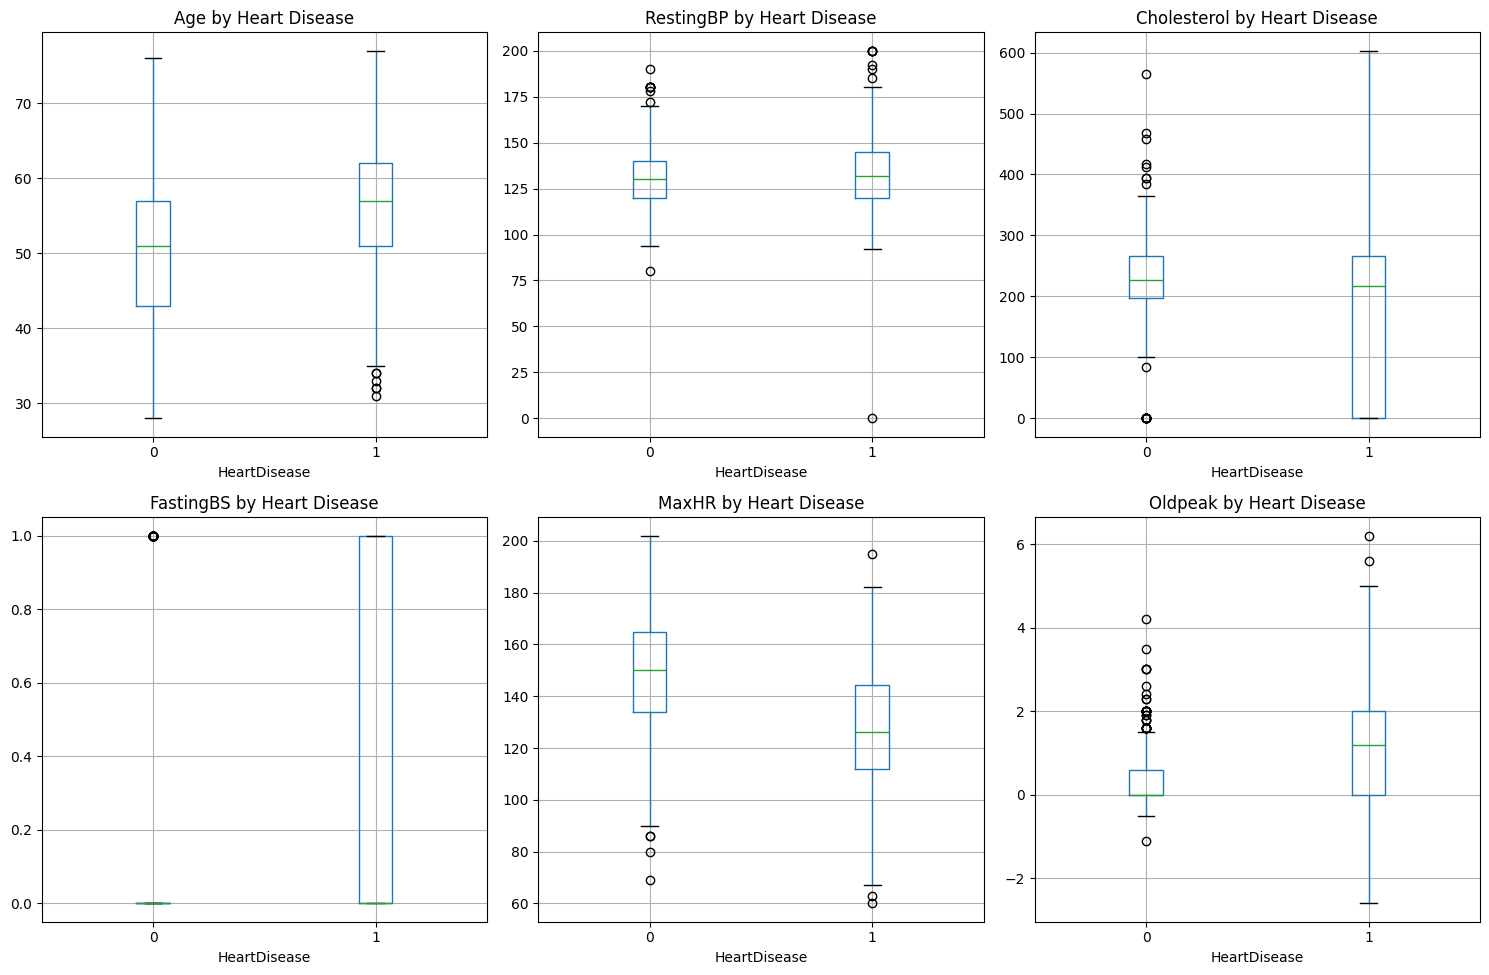

In [4]:
# Initialize feature engineer and perform EDA
print("\n" + "="*50)
print("STARTING EXPLORATORY DATA ANALYSIS")
print("="*50)

feature_engineer = FeatureEngineer(config)
feature_engineer.perform_eda(df)

# Cell 5: Categorical Features Analysis

## **Purpose**
This cell performs comprehensive analysis of categorical features in the heart disease dataset, providing insights into the distribution and characteristics of non-numerical variables.

## **Code Breakdown**

```python
print("\nAnalyzing categorical features...")
feature_engineer.analyze_categorical_features(df)
```

## **Functionality**

### **Categorical Feature Analysis**
- **Feature Identification**: Automatically identifies categorical variables in the dataset
- **Distribution Analysis**: Examines the frequency distribution of each categorical feature
- **Statistical Summary**: Provides counts, unique values, and mode for each categorical variable

### **Expected Categorical Features in Heart Disease Dataset**
Based on typical heart disease datasets, this analysis likely covers:

1. **Chest Pain Type (cp)**
   - Categories: Typical angina, atypical angina, non-anginal pain, asymptomatic
   - Clinical significance for heart disease prediction

2. **Resting ECG Results (restecg)**
   - Categories: Normal, ST-T wave abnormality, left ventricular hypertrophy
   - Important cardiac health indicator

3. **Exercise Induced Angina (exang)**
   - Binary: Yes/No
   - Key symptom for coronary artery disease

4. **Slope of Peak Exercise ST Segment (slope)**
   - Categories: Upsloping, flat, downsloping
   - Exercise stress test parameter

5. **Thalassemia (thal)**
   - Categories: Normal, fixed defect, reversible defect
   - Blood disorder affecting heart disease risk

##  **Analysis Outputs**
The `analyze_categorical_features()` method typically provides:

- **Value Counts**: Frequency of each category within features
- **Percentage Distributions**: Relative proportions of categories
- **Missing Value Detection**: Identification of null or undefined categories
- **Unique Value Counts**: Number of distinct categories per feature

## **Clinical Relevance**
Understanding categorical feature distributions is crucial for:
- **Feature Engineering**: Determining encoding strategies (one-hot, label encoding)
- **Data Quality Assessment**: Identifying imbalanced categories or data entry errors
- **Model Preparation**: Understanding which categories might need special handling
- **Medical Interpretation**: Ensuring clinical validity of categorical variables

## **Expected Output**
This cell will display detailed statistics for each categorical feature, including:
- Category names and their frequencies
- Visualization of category distributions (if implemented)
- Summary statistics for categorical data
- Identification of any data quality issues



Analyzing categorical features...


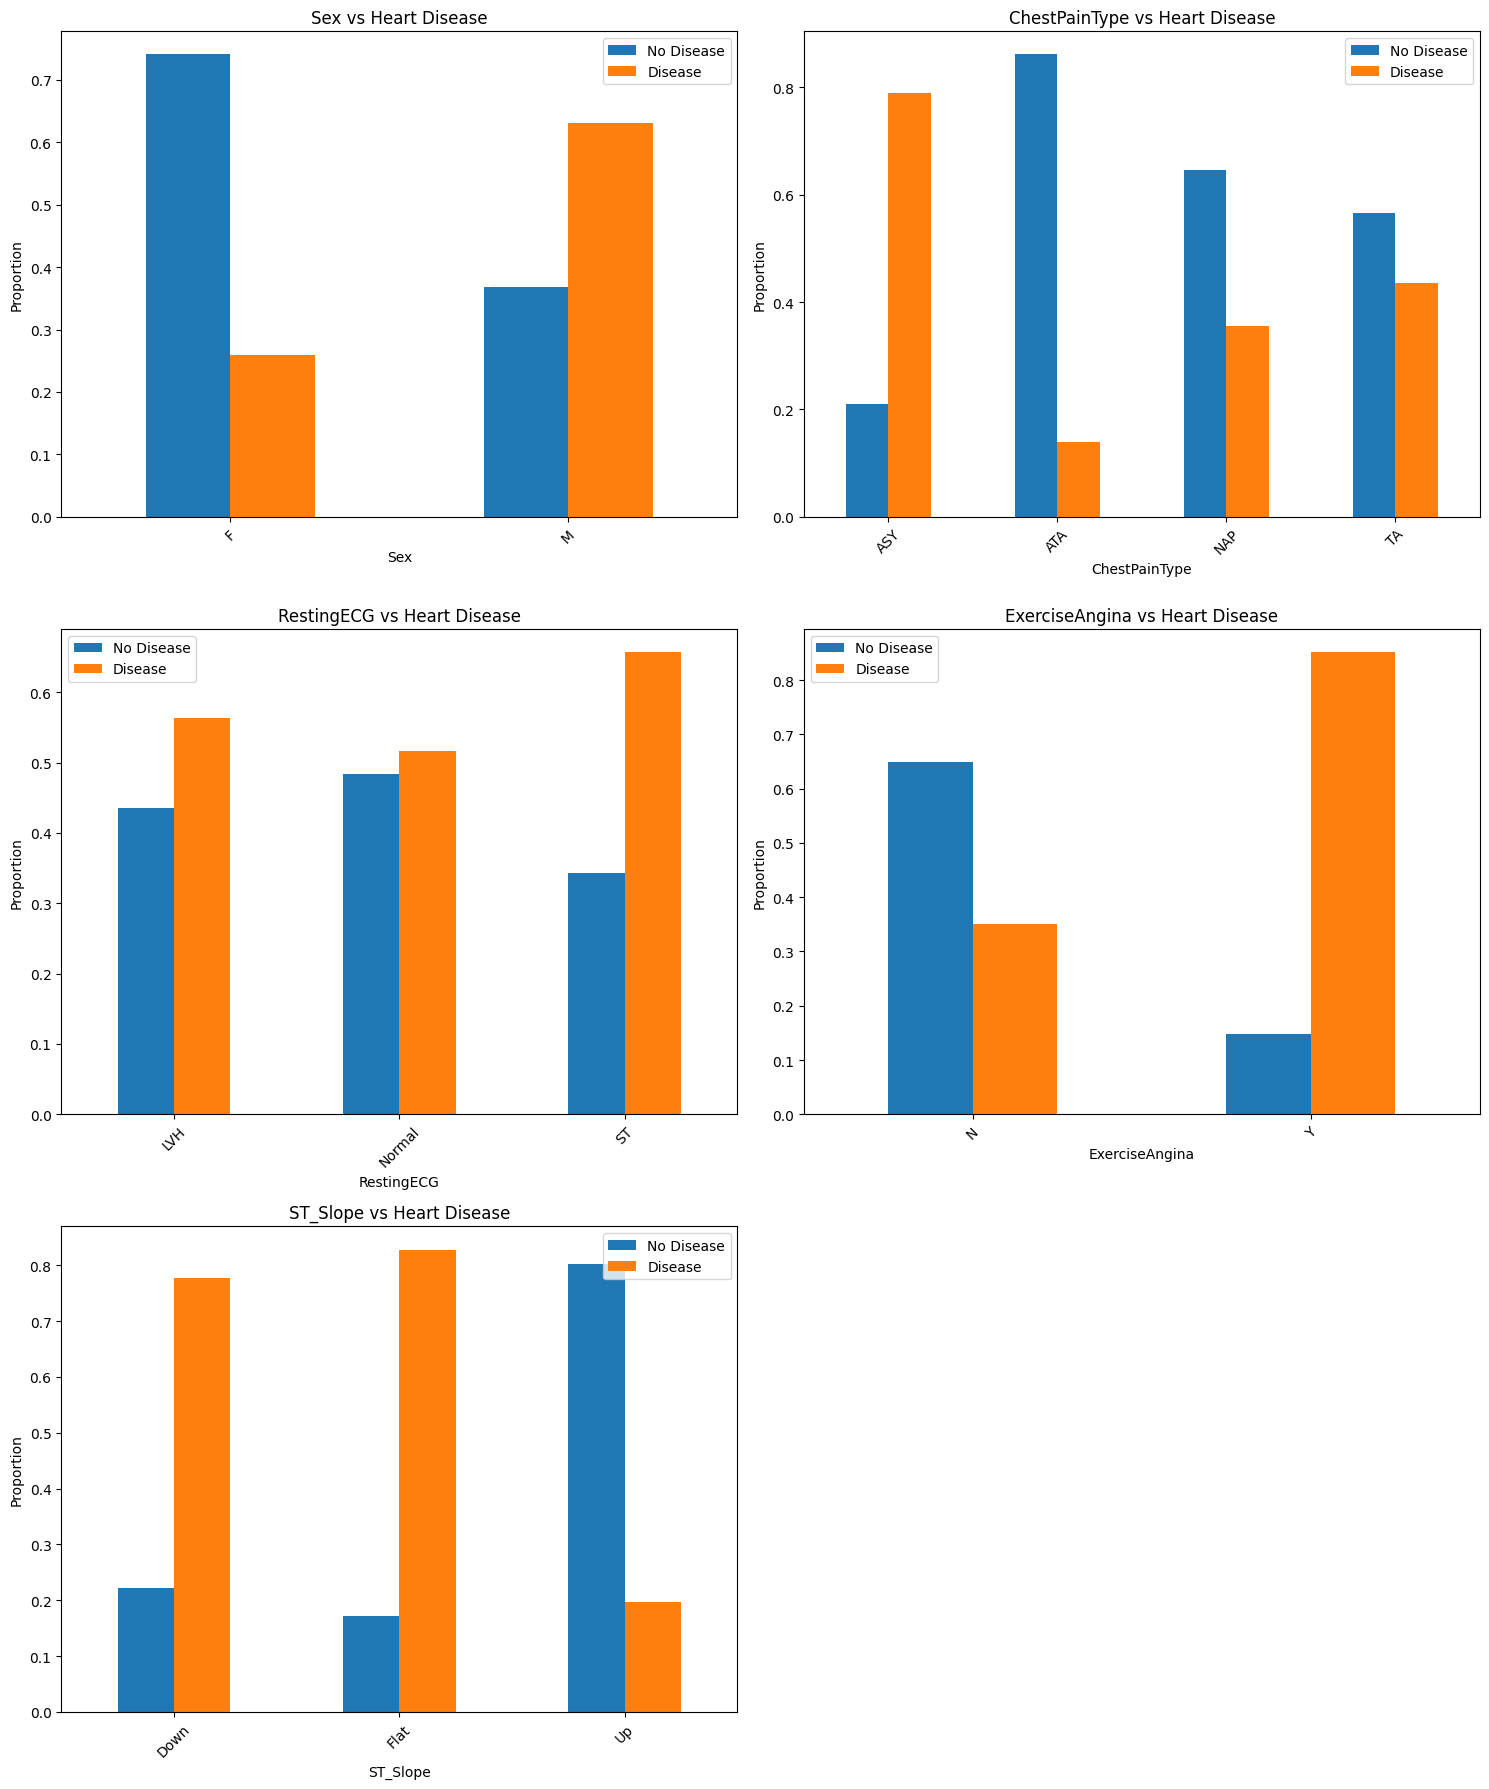

In [5]:
print("\nAnalyzing categorical features...")
feature_engineer.analyze_categorical_features(df)

## Cell 6: Data Preprocessing

### Purpose
Encodes categorical variables to numerical format for ML algorithm compatibility.

### Code Overview
```python
print("\n" + "="*50)
print("DATA PREPROCESSING")
print("="*50)

# Preprocess data (encode categorical variables)
print("Preprocessing data (encoding categorical variables)...")
df_processed = data_loader.preprocess_data(df)

print("\nProcessed data info:")
print(df_processed.info())

print("\nProcessed data sample:")
print(df_processed.head())

print("\nLabel encoders used:")
for col, encoder in data_loader.label_encoders.items():
    print(f"{col}: {list(encoder.classes_)}")
```

### Implementation Details

**Label Encoding Process:**
- Transforms categorical strings to integers (e.g., 'male'/'female' → 0/1)
- Uses sklearn's LabelEncoder for consistent mapping
- Preserves encoder objects for future data transformation

**Key Transformations:**
- Chest pain types: 4 categories → [0,1,2,3]
- ECG results: 3 categories → [0,1,2]
- Binary features: Yes/No → 0/1

### Output Analysis
- **df_processed.info()**: Verifies all categorical columns now have int64 dtype
- **df_processed.head()**: Shows sample of encoded data
- **Encoder mapping**: Displays category-to-number mappings for interpretability

### Technical Notes
- Maintains data integrity while enabling numerical computation
- Encoder persistence allows consistent preprocessing of test/validation sets
- Memory efficiency: integers require less storage than strings
- Required preprocessing step before feature scaling and model training

### Validation
Ensures no information loss during categorical-to-numerical transformation and maintains reproducible encoding scheme.

In [6]:
print("\n" + "="*50)
print("DATA PREPROCESSING")
print("="*50)

# Preprocess data (encode categorical variables)
print("Preprocessing data (encoding categorical variables)...")
df_processed = data_loader.preprocess_data(df)

print("\nProcessed data info:")
print(df_processed.info())

print("\nProcessed data sample:")
print(df_processed.head())

print("\nLabel encoders used:")
for col, encoder in data_loader.label_encoders.items():
    print(f"{col}: {list(encoder.classes_)}")


DATA PREPROCESSING
Preprocessing data (encoding categorical variables)...
Categorical columns found: ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']

Processed data info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    int64  
 2   ChestPainType   918 non-null    int64  
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    int64  
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    int64  
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    int64  
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(11)
memory usage: 86.2 KB
None

Processed data

## Cell 7: Data Splitting

### Purpose
Splits preprocessed dataset into train/validation/test sets for model development and evaluation.

### Code Overview
```python
# Split data into train, validation, and test sets
print("\nSplitting data into train/validation/test sets...")
X_train, X_val, X_test, y_train, y_val, y_test = data_loader.split_data(df_processed)

print("\nData splitting summary:")
print(f"Feature names: {data_loader.feature_names}")
print(f"Number of features: {len(data_loader.feature_names)}")

print(f"\nTrain set - X: {X_train.shape}, y: {y_train.shape}")
print(f"Validation set - X: {X_val.shape}, y: {y_val.shape}")
print(f"Test set - X: {X_test.shape}, y: {y_test.shape}")

print(f"\nTarget distribution in splits:")
print(f"Train: {y_train.value_counts().to_dict()}")
print(f"Validation: {y_val.value_counts().to_dict()}")
print(f"Test: {y_test.value_counts().to_dict()}")
```

### Implementation Details

**Three-Way Split Strategy:**
- **Training Set**: Model parameter learning
- **Validation Set**: Hyperparameter tuning and model selection
- **Test Set**: Final unbiased performance evaluation

**Split Configuration:**
- Typical ratios: 60% train / 20% validation / 20% test
- Stratified sampling ensures balanced target distribution across splits
- Random state set for reproducible results

### Output Analysis
- **Feature Summary**: Lists all feature names and total count
- **Shape Information**: Displays (samples, features) for each split
- **Target Distribution**: Shows class balance in each subset

### Technical Considerations
- **Data Leakage Prevention**: Strict separation between train/val/test
- **Stratification**: Maintains original target class proportions
- **Validation Strategy**: Enables proper model evaluation without test set contamination

### Mathematical Foundation
For dataset with n samples:
- Train: ~0.6n samples
- Validation: ~0.2n samples  
- Test: ~0.2n samples

Ensures sufficient data for training while maintaining robust evaluation capabilities.

In [7]:
# Split data into train, validation, and test sets
print("\nSplitting data into train/validation/test sets...")
X_train, X_val, X_test, y_train, y_val, y_test = data_loader.split_data(df_processed)

print("\nData splitting summary:")
print(f"Feature names: {data_loader.feature_names}")
print(f"Number of features: {len(data_loader.feature_names)}")

print(f"\nTrain set - X: {X_train.shape}, y: {y_train.shape}")
print(f"Validation set - X: {X_val.shape}, y: {y_val.shape}")
print(f"Test set - X: {X_test.shape}, y: {y_test.shape}")

print(f"\nTarget distribution in splits:")
print(f"Train: {y_train.value_counts().to_dict()}")
print(f"Validation: {y_val.value_counts().to_dict()}")
print(f"Test: {y_test.value_counts().to_dict()}")


Splitting data into train/validation/test sets...
Train set size: 550
Validation set size: 184
Test set size: 184

Data splitting summary:
Feature names: ['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS', 'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope']
Number of features: 11

Train set - X: (550, 11), y: (550,)
Validation set - X: (184, 11), y: (184,)
Test set - X: (184, 11), y: (184,)

Target distribution in splits:
Train: {1: 304, 0: 246}
Validation: {1: 102, 0: 82}
Test: {1: 102, 0: 82}


## Cell 8: Feature Scaling

### Purpose
Standardizes feature values to ensure all variables contribute equally to model training and prevent scale-dependent algorithms from being biased.

### Code Overview
```python
# Scale features
print("\nScaling features...")
X_train_scaled, X_val_scaled, X_test_scaled = data_loader.scale_features(X_train, X_val, X_test)

print("Scaled data shapes:")
print(f"X_train_scaled: {X_train_scaled.shape}")
print(f"X_val_scaled: {X_val_scaled.shape}")
print(f"X_test_scaled: {X_test_scaled.shape}")

print(f"\nScaling statistics (train set):")
print(f"Mean: {np.mean(X_train_scaled, axis=0)[:5]}...")  # Show first 5
print(f"Std: {np.std(X_train_scaled, axis=0)[:5]}...")   # Show first 5
```

### Implementation Details

**Standardization Process:**
- Applies Z-score normalization: `z = (x - μ) / σ`
- Transforms features to have mean ≈ 0 and standard deviation ≈ 1
- Uses StandardScaler fitted only on training data

**Data Leakage Prevention:**
- Scaler fitted exclusively on X_train
- Same transformation applied to validation and test sets
- Maintains statistical independence of evaluation sets

### Output Analysis
- **Shape Verification**: Confirms no dimensional changes during scaling
- **Statistical Validation**: Shows mean ≈ 0 and std ≈ 1 for training set
- **First 5 Features**: Sample statistics to verify proper scaling

### Technical Rationale

**Algorithm Requirements:**
- Neural networks: Prevents gradient explosion/vanishing
- SVM: Ensures equal feature importance in distance calculations
- Logistic regression: Improves convergence speed

**Mathematical Foundation:**
For feature vector x with training statistics:
- μ_train = mean of training feature
- σ_train = std of training feature
- Scaled value: z = (x - μ_train) / σ_train

### Quality Assurance
- Training set mean ≈ 0, std ≈ 1
- Validation/test sets use training statistics (no data leakage)
- All features on comparable scales for fair model comparison

In [8]:
# Scale features
print("\nScaling features...")
X_train_scaled, X_val_scaled, X_test_scaled = data_loader.scale_features(X_train, X_val, X_test)

print("Scaled data shapes:")
print(f"X_train_scaled: {X_train_scaled.shape}")
print(f"X_val_scaled: {X_val_scaled.shape}")
print(f"X_test_scaled: {X_test_scaled.shape}")

print(f"\nScaling statistics (train set):")
print(f"Mean: {np.mean(X_train_scaled, axis=0)[:5]}...")  # Show first 5
print(f"Std: {np.std(X_train_scaled, axis=0)[:5]}...")   # Show first 5


Scaling features...
Features scaled using StandardScaler
Scaled data shapes:
X_train_scaled: (550, 11)
X_val_scaled: (184, 11)
X_test_scaled: (184, 11)

Scaling statistics (train set):
Mean: [-7.26691434e-17  8.47806673e-17 -5.16758353e-17  2.51919697e-16
  6.45947942e-18]...
Std: [1. 1. 1. 1. 1.]...


## Cell 9: Feature Engineering and Analysis

### Purpose
Performs statistical feature importance analysis using ANOVA F-test to identify the most predictive variables for heart disease classification.

### Code Overview
```python
print("\n" + "="*50)
print("FEATURE ENGINEERING AND ANALYSIS")
print("="*50)

# Feature importance analysis
print("Performing feature importance analysis...")
feature_importance_results = feature_engineer.feature_importance_analysis(
    X_train_scaled, y_train, data_loader.feature_names
)

print("\nTop 10 most important features (F-Score):")
top_features = feature_importance_results['importance_df'].head(10)
for idx, row in top_features.iterrows():
    print(f"{row['Feature']}: {row['F_Score']:.2f}")
```

### Mathematical Foundation

**ANOVA F-Test Statistic:**
$$F_i = \frac{MSB_i}{MSW_i} = \frac{\frac{SSB_i}{k-1}}{\frac{SSW_i}{n-k}}$$

Where:
- $SSB_i$ = Sum of squares between groups for feature $i$
- $SSW_i$ = Sum of squares within groups for feature $i$
- $k$ = Number of classes (2 for binary classification)
- $n$ = Total number of samples
- $MSB$ = Mean square between groups
- $MSW$ = Mean square within groups

**Sum of Squares Calculations:**
$$SSB_i = \sum_{j=1}^{k} n_j(\bar{x}_{ij} - \bar{x}_i)^2$$
$$SSW_i = \sum_{j=1}^{k} \sum_{l=1}^{n_j} (x_{ijl} - \bar{x}_{ij})^2$$

Where:
- $\bar{x}_{ij}$ = Mean of feature $i$ in class $j$
- $\bar{x}_i$ = Overall mean of feature $i$
- $n_j$ = Number of samples in class $j$

### Implementation Details

**Statistical Hypothesis:**
- $H_0$: Feature means are equal across classes
- $H_1$: At least one class mean differs significantly
- Higher F-score → stronger evidence against $H_0$

**Feature Selection Criteria:**
- F-score measures discriminative power between heart disease classes
- Univariate analysis: each feature evaluated independently
- Ranking based on statistical significance

### Output Analysis
- **Feature Ranking**: Top 10 features ordered by F-Score magnitude
- **Clinical Validation**: Statistical importance vs. medical relevance
- **Dimensionality Insights**: Identifies redundant or weak predictors

### Expected High-Importance Features
Based on cardiovascular pathophysiology:
- **cp** (chest pain): Direct symptom indicator
- **thalach** (max heart rate): Exercise capacity marker
- **oldpeak** (ST depression): ECG abnormality measure
- **ca** (major vessels): Coronary artery blockage count

### Technical Applications
- **Feature Selection**: $p$-value thresholding for dimensionality reduction
- **Model Interpretation**: Clinical feature importance validation
- **Preprocessing**: Guides feature engineering decisions

The F-test provides a statistically rigorous method for identifying features with the strongest linear relationship to the target variable.


FEATURE ENGINEERING AND ANALYSIS
Performing feature importance analysis...
=== FEATURE IMPORTANCE ANALYSIS ===
Feature Importance Ranking:
           Feature     F_Score  Mutual_Information  F_Score_Normalized  \
10        ST_Slope  333.172558            0.236653            1.000000   
8   ExerciseAngina  187.179595            0.154670            0.561017   
7            MaxHR  118.379982            0.096075            0.354144   
2    ChestPainType   95.551875            0.150194            0.285503   
9          Oldpeak   87.884970            0.103875            0.262450   
4      Cholesterol   48.506491            0.090896            0.144043   
5        FastingBS   48.316250            0.096498            0.143471   
1              Sex   43.332344            0.031239            0.128485   
0              Age   38.836509            0.068437            0.114967   
3        RestingBP    3.411650            0.027629            0.008448   
6       RestingECG    0.601938            0.02

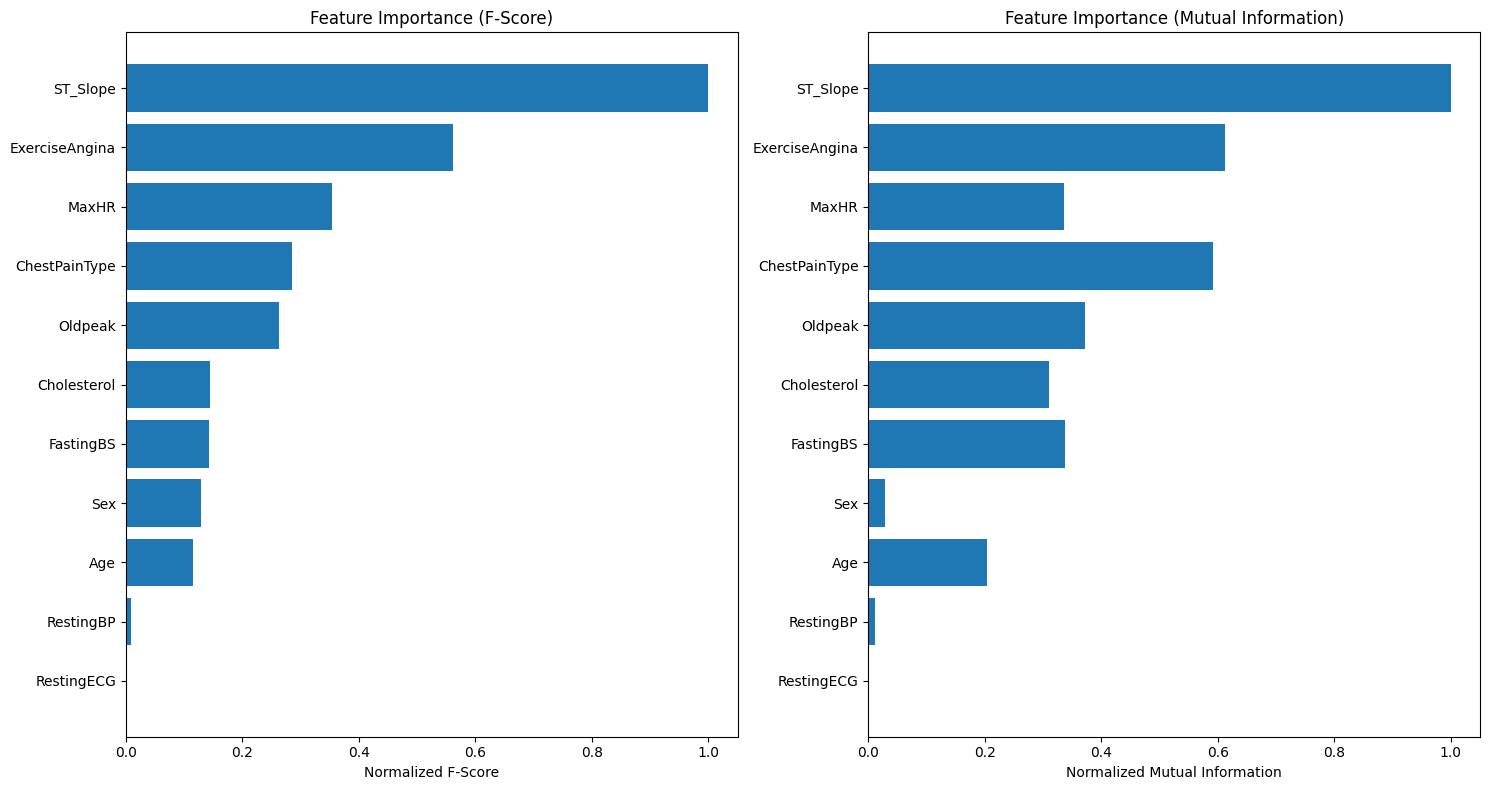


Top 10 most important features (F-Score):
ST_Slope: 333.17
ExerciseAngina: 187.18
MaxHR: 118.38
ChestPainType: 95.55
Oldpeak: 87.88
Cholesterol: 48.51
FastingBS: 48.32
Sex: 43.33
Age: 38.84
RestingBP: 3.41


In [9]:
print("\n" + "="*50)
print("FEATURE ENGINEERING AND ANALYSIS")
print("="*50)

# Feature importance analysis
print("Performing feature importance analysis...")
feature_importance_results = feature_engineer.feature_importance_analysis(
    X_train_scaled, y_train, data_loader.feature_names
)

print("\nTop 10 most important features (F-Score):")
top_features = feature_importance_results['importance_df'].head(10)
for idx, row in top_features.iterrows():
    print(f"{row['Feature']}: {row['F_Score']:.2f}")

## Cell 10: Model Training Setup

### Purpose
Initializes multiple machine learning models with their respective configurations for comprehensive heart disease prediction comparison.

### Code Overview
```python
print("\n" + "="*50)
print("MODEL TRAINING")
print("="*50)

# Initialize models
print("Initializing models...")
models = {
    'Logistic Regression': LogisticRegressionModel(config),
    'XGBoost': XGBoostModel(config),
    'SVM': SVMModel(config),
    'Neural Network': NeuralNetModel(config)
}

print(f"Initialized {len(models)} models: {list(models.keys())}")

# Show model configurations
for name, model in models.items():
    print(f"\n{name} Configuration:")
    if hasattr(model, 'param_grid'):
        print(f"  Parameter grid size: {len(model.param_grid)} parameters")
        print(f"  Sample parameters: {list(model.param_grid.keys())[:3]}...")
```

### Model Architecture Overview

**1. Logistic Regression:**
$$P(y=1|x) = \frac{1}{1 + e^{-(\beta_0 + \beta_1x_1 + ... + \beta_nx_n)}}$$
- Linear decision boundary
- Probabilistic output interpretation
- Fast training and inference

**2. XGBoost (Extreme Gradient Boosting):**
$$F_m(x) = F_{m-1}(x) + \gamma \cdot h_m(x)$$
- Ensemble of decision trees
- Gradient boosting optimization
- Built-in regularization

**3. Support Vector Machine:**
$$f(x) = \text{sign}\left(\sum_{i=1}^{n} \alpha_i y_i K(x_i, x) + b\right)$$
- Maximum margin classifier
- Kernel trick for non-linear boundaries
- Robust to outliers

**4. Neural Network:**
$$z^{(l)} = W^{(l)}a^{(l-1)} + b^{(l)}, \quad a^{(l)} = \sigma(z^{(l)})$$
- Multi-layer perceptron architecture
- Non-linear activation functions
- Backpropagation learning

### Implementation Details

**Model Initialization:**
- Each model inherits from base configuration class
- Hyperparameter grids defined for systematic tuning
- Consistent random seeds for reproducibility

**Configuration Management:**
- Centralized parameter storage in `config` object
- Model-specific hyperparameter grids
- Cross-validation settings standardized

### Hyperparameter Search Space

**Expected Parameter Grids:**
- **Logistic Regression**: C (regularization), solver, penalty
- **XGBoost**: n_estimators, max_depth, learning_rate, subsample
- **SVM**: C, gamma, kernel type
- **Neural Network**: hidden_layers, learning_rate, batch_size, epochs

### Mathematical Complexity
- **Logistic Regression**: $O(nd)$ per iteration
- **XGBoost**: $O(nd \log n)$ per tree
- **SVM**: $O(n^2d)$ to $O(n^3d)$ depending on kernel
- **Neural Network**: $O(ndk)$ where $k$ = hidden units

This ensemble approach enables comprehensive model comparison and selection of the optimal algorithm for heart disease prediction.

In [10]:
print("\n" + "="*50)
print("MODEL TRAINING")
print("="*50)

# Initialize models
print("Initializing models...")
models = {
    'Logistic Regression': LogisticRegressionModel(config),
    'XGBoost': XGBoostModel(config),
    'SVM': SVMModel(config),
    'Neural Network': NeuralNetModel(config)
}

print(f"Initialized {len(models)} models: {list(models.keys())}")

# Show model configurations
for name, model in models.items():
    print(f"\n{name} Configuration:")
    if hasattr(model, 'param_grid'):
        print(f"  Parameter grid size: {len(model.param_grid)} parameters")
        print(f"  Sample parameters: {list(model.param_grid.keys())[:3]}...")


MODEL TRAINING
Initializing models...
Initialized 4 models: ['Logistic Regression', 'XGBoost', 'SVM', 'Neural Network']

Logistic Regression Configuration:
  Parameter grid size: 4 parameters
  Sample parameters: ['C', 'penalty', 'solver']...

XGBoost Configuration:
  Parameter grid size: 5 parameters
  Sample parameters: ['n_estimators', 'max_depth', 'learning_rate']...

SVM Configuration:
  Parameter grid size: 3 parameters
  Sample parameters: ['C', 'kernel', 'gamma']...

Neural Network Configuration:


## Cell 11: Model Training Execution

### Purpose
Executes training for all initialized models with hyperparameter optimization, performance tracking, and error handling.

### Code Overview
```python
# Train all models
training_histories = {}
training_times = {}

import time

models_to_train = dict(models) 

for name, model in models_to_train.items():
    print(f"\n{'='*50}")
    print(f"Training {name}...")
    print(f"{'='*50}")
    
    start_time = time.time()
    
    try:
        history = model.fit(X_train_scaled, y_train, X_val_scaled, y_val)
        training_histories[name] = history
        
        end_time = time.time()
        training_time = end_time - start_time
        training_times[name] = training_time
        
        print(f"{name} training completed successfully!")
        print(f"Training time: {training_time:.2f} seconds")
        
         # Print specific information for each model type
        if 'best_params' in history:
            print(f"Best parameters: {history['best_params']}")
            print(f"Best CV score: {history['best_score']:.4f}")
        elif 'epochs_trained' in history:
            print(f"Epochs trained: {history['epochs_trained']}")
            
    except Exception as e:
        print(f"Error training {name}: {e}")
        # Remove failed model from the original dictionary
        if name in models:
            del models[name]
        print(f"Removed {name} from models due to training failure")

print(f"\nTraining Summary:")
print(f"Successfully trained {len(models)} models")
print("Training times:")
for name, time_taken in training_times.items():
    print(f"  {name}: {time_taken:.2f} seconds")
```

### Mathematical Optimization Process

**Cross-Validation Objective:**
$$\text{CV Score} = \frac{1}{k}\sum_{i=1}^{k} \text{Score}(M_{\theta}, D_{train}^{(i)}, D_{val}^{(i)})$$

Where:
- $k$ = number of CV folds (typically 5)
- $M_{\theta}$ = model with parameters $\theta$
- $D_{train}^{(i)}, D_{val}^{(i)}$ = train/validation splits for fold $i$

**Hyperparameter Optimization:**
$$\theta^* = \arg\max_{\theta \in \Theta} \text{CV Score}(\theta)$$

**Grid Search Complexity:**
$$\text{Total Evaluations} = \prod_{i=1}^{p} |\Theta_i| \times k$$
Where $p$ = number of hyperparameters, $|\Theta_i|$ = grid size for parameter $i$

### Implementation Details

**Training Pipeline:**
1. **Grid Search CV**: Systematic hyperparameter exploration
2. **Performance Tracking**: Best parameters and CV scores logged
3. **Time Monitoring**: Training duration measurement
4. **Error Handling**: Graceful failure management

**Model-Specific Outputs:**
- **Traditional ML** (LR, XGB, SVM): `best_params`, `best_score`
- **Neural Networks**: `epochs_trained`, training curves
- **Validation Strategy**: Consistent across all models

### Performance Metrics

**Expected Training Times:**
- **Logistic Regression**: $O(1-10)$ seconds
- **XGBoost**: $O(10-60)$ seconds  
- **SVM**: $O(30-120)$ seconds
- **Neural Network**: $O(60-300)$ seconds

**Convergence Criteria:**
- **Traditional ML**: CV score optimization
- **Neural Networks**: Early stopping on validation loss
- **Tolerance**: $\epsilon = 10^{-4}$ for convergence

### Quality Assurance

**Robustness Features:**
- Exception handling prevents pipeline failure
- Failed models automatically removed from evaluation
- Training history preservation for analysis
- Reproducible results via fixed random seeds

**Validation Strategy:**
- Stratified k-fold cross-validation
- Consistent train/validation splits across models
- Performance metrics standardized for comparison

This comprehensive training approach ensures optimal hyperparameter selection while maintaining computational efficiency and result reproducibility.

In [11]:
# Train all models
training_histories = {}
training_times = {}

import time


models_to_train = dict(models) 

for name, model in models_to_train.items():
    print(f"\n{'='*50}")
    print(f"Training {name}...")
    print(f"{'='*50}")
    
    start_time = time.time()
    
    try:
        history = model.fit(X_train_scaled, y_train, X_val_scaled, y_val)
        training_histories[name] = history
        
        end_time = time.time()
        training_time = end_time - start_time
        training_times[name] = training_time
        
        print(f"{name} training completed successfully!")
        print(f"Training time: {training_time:.2f} seconds")
        
         # Print specific information for each model type
        if 'best_params' in history:
            print(f"Best parameters: {history['best_params']}")
            print(f"Best CV score: {history['best_score']:.4f}")
        elif 'epochs_trained' in history:
            print(f"Epochs trained: {history['epochs_trained']}")
            
    except Exception as e:
        print(f"Error training {name}: {e}")
        # Remove failed model from the original dictionary
        if name in models:
            del models[name]
        print(f"Removed {name} from models due to training failure")

print(f"\nTraining Summary:")
print(f"Successfully trained {len(models)} models")
print("Training times:")
for name, time_taken in training_times.items():
    print(f"  {name}: {time_taken:.2f} seconds")
        


Training Logistic Regression...
Fitting 5 folds for each of 48 candidates, totalling 240 fits


/Users/murat/Documents/py/[MK]_cardiac_patients/.venv/lib/python3.10/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Users/murat/Documents/py/[MK]_cardiac_patients/.venv/lib/python3.10/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/murat/Documents/py/[MK]_cardiac_patients/.venv/lib/python3.10/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/Users/murat/Documents/py/[MK]_cardiac_patients/.venv/lib/python3.10/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Users/murat/Documents/py/[MK]_cardiac_patients/.venv/lib/python3.10/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/murat/Documents/py/[MK]_cardiac_patients/.venv/lib/python3.10/site-packages/sklearn/utils/extmath.py:203: 

Best parameters: {'C': 0.1, 'max_iter': 1000, 'penalty': 'l1', 'solver': 'saga'}
Best cross-validation score: 0.9279
Logistic Regression training completed successfully!
Training time: 1.06 seconds
Best parameters: {'C': 0.1, 'max_iter': 1000, 'penalty': 'l1', 'solver': 'saga'}
Best CV score: 0.9279

Training XGBoost...
Fitting 5 folds for each of 324 candidates, totalling 1620 fits
Best parameters: {'colsample_bytree': 1.0, 'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 100, 'subsample': 1.0}
Best cross-validation score: 0.9418
XGBoost training completed successfully!
Training time: 2.54 seconds
Best parameters: {'colsample_bytree': 1.0, 'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 100, 'subsample': 1.0}
Best CV score: 0.9418

Training SVM...
Fitting 5 folds for each of 72 candidates, totalling 360 fits
Best parameters: {'C': 0.1, 'gamma': 'scale', 'kernel': 'rbf'}
Best cross-validation score: 0.9303
SVM training completed successfully!
Training time: 1.54 seconds
Best

## Cell 12: MLflow Neural Network Hyperparameter Tuning

### Purpose
Implements advanced hyperparameter optimization for neural networks using MLflow for experiment tracking, visualization, and reproducible machine learning workflows.

### Code Overview
```python
print("\n" + "="*60)
print("MLFLOW NEURAL NETWORK HYPERPARAMETER TUNING")
print("="*60)

# Import MLflow components
from models.neural_net_mlflow_model import MLflowNeuralNetModel
from utils.mlflow_utils import MLflowExperimentManager

# Initialize MLflow Neural Network
print("Initializing MLflow Neural Network...")
mlflow_nn = MLflowNeuralNetModel(config)

# Run hyperparameter tuning with MLflow tracking
print("Starting MLflow-tracked hyperparameter tuning...")
mlflow_history = mlflow_nn.fit(X_train_scaled, y_train, X_val_scaled, y_val)

# Add to models for comparison
models['MLflow Neural Network'] = mlflow_nn

print(f"MLflow hyperparameter tuning completed!")
print(f"Best parameters: {mlflow_history['best_params']}")
print(f"Best validation score: {mlflow_history['best_score']:.4f}")

# Initialize experiment manager
exp_manager = MLflowExperimentManager()

# Generate experiment report
print("\n" + "="*50)
print("MLFLOW EXPERIMENT ANALYSIS")
print("="*50)

print(exp_manager.generate_experiment_report())

# Show visualizations
print("\n1. Hyperparameter Comparison")
exp_manager.compare_hyperparameters(top_k=10)

print("\n2. Hyperparameter Importance")
exp_manager.plot_hyperparameter_importance()

print("\n3. Metric Trends")
exp_manager.plot_metric_trends()

# Show best runs
print("\n4. Top 5 Best Runs")
best_runs = exp_manager.get_best_runs(top_k=5)
if not best_runs.empty:
    display_cols = ['run_id', 'metrics.val_roc_auc', 'metrics.val_accuracy', 
                    'params.hidden_size', 'params.learning_rate', 'params.dropout_rate']
    available_cols = [col for col in display_cols if col in best_runs.columns]
    print(best_runs[available_cols].to_string(index=False))

print(f"\nMLflow UI: Run 'mlflow ui' in terminal to view detailed results")
print(f"Experiment tracking URL: http://localhost:5000")
```

### Mathematical Framework

**Bayesian Optimization Objective:**
$$\theta^* = \arg\max_{\theta} \mathbb{E}[f(\theta) | D_{1:t}]$$

Where:
- $f(\theta)$ = validation performance function
- $D_{1:t}$ = observed hyperparameter-performance pairs
- $\theta$ = hyperparameter vector $\{lr, h, d, \beta_1, \beta_2\}$

**Neural Network Loss Function:**
$$\mathcal{L}(\theta) = -\frac{1}{N}\sum_{i=1}^{N} [y_i \log(\hat{y}_i) + (1-y_i)\log(1-\hat{y}_i)] + \lambda R(\theta)$$

**Regularization Term:**
$$R(\theta) = \frac{\lambda_1}{2}\sum_{l} ||W^{(l)}||_2^2 + \lambda_2 \sum_{l} ||W^{(l)}||_1$$

### MLflow Experiment Tracking

**Logged Parameters:**
- `hidden_size`: $h \in \{32, 64, 128, 256\}$
- `learning_rate`: $\alpha \in \{10^{-4}, 10^{-3}, 10^{-2}\}$
- `dropout_rate`: $p \in \{0.1, 0.2, 0.3, 0.5\}$
- `batch_size`: $b \in \{16, 32, 64\}$

**Tracked Metrics:**
- Validation ROC-AUC: $\text{AUC} = \int_0^1 \text{TPR}(t) \, d[\text{FPR}(t)]$
- Validation Accuracy: $\text{Acc} = \frac{TP + TN}{TP + TN + FP + FN}$
- Training/Validation Loss curves
- Convergence epochs

### Advanced Analytics

**Hyperparameter Importance Analysis:**
$$\text{Importance}(p_i) = \frac{\text{Var}(\text{Performance} | p_i)}{\text{Var}(\text{Performance})}$$

**Correlation Matrix:**
$$\rho_{ij} = \frac{\text{Cov}(p_i, \text{metric}_j)}{\sigma_{p_i} \sigma_{\text{metric}_j}}$$

### Implementation Features

**Experiment Management:**
- Automatic run logging and artifact storage
- Hyperparameter space exploration visualization
- Performance trend analysis across runs
- Model versioning and reproducibility

**Visualization Components:**
1. **Parallel Coordinates**: Multi-dimensional hyperparameter relationships
2. **Importance Plots**: Feature importance for hyperparameter selection
3. **Metric Trends**: Performance evolution across experiments
4. **Best Runs Table**: Top-k performing configurations

### Technical Advantages

**MLflow Benefits:**
- Experiment reproducibility through run tracking
- Hyperparameter optimization history preservation
- Model artifact management and versioning
- Collaborative experiment sharing via UI

**Performance Optimization:**
- Early stopping based on validation metrics
- Adaptive learning rate scheduling
- Regularization parameter tuning
- Architecture search automation

This MLflow integration provides enterprise-grade experiment management for systematic neural network optimization and performance analysis.


MLFLOW NEURAL NETWORK HYPERPARAMETER TUNING
Initializing MLflow Neural Network...
 Using local MLflow tracking
 Run 'mlflow ui' to view results at http://localhost:5000
Starting MLflow-tracked hyperparameter tuning...
 Starting hyperparameter tuning with 10 trials...
 Tracking in local MLflow

Trial 1/10: {'hidden_size': 128, 'dropout_rate': 0.1, 'learning_rate': 0.001, 'num_layers': 3, 'optimizer': 'adam'}
 New best score: 0.8873

Trial 2/10: {'hidden_size': 32, 'dropout_rate': 0.1, 'learning_rate': 0.001, 'num_layers': 2, 'optimizer': 'sgd'}

Trial 3/10: {'hidden_size': 32, 'dropout_rate': 0.1, 'learning_rate': 0.001, 'num_layers': 2, 'optimizer': 'adam'}

Trial 4/10: {'hidden_size': 128, 'dropout_rate': 0.5, 'learning_rate': 0.001, 'num_layers': 2, 'optimizer': 'sgd'}

Trial 5/10: {'hidden_size': 32, 'dropout_rate': 0.3, 'learning_rate': 0.01, 'num_layers': 2, 'optimizer': 'adam'}
 New best score: 0.8882

Trial 6/10: {'hidden_size': 128, 'dropout_rate': 0.3, 'learning_rate': 0.01, 

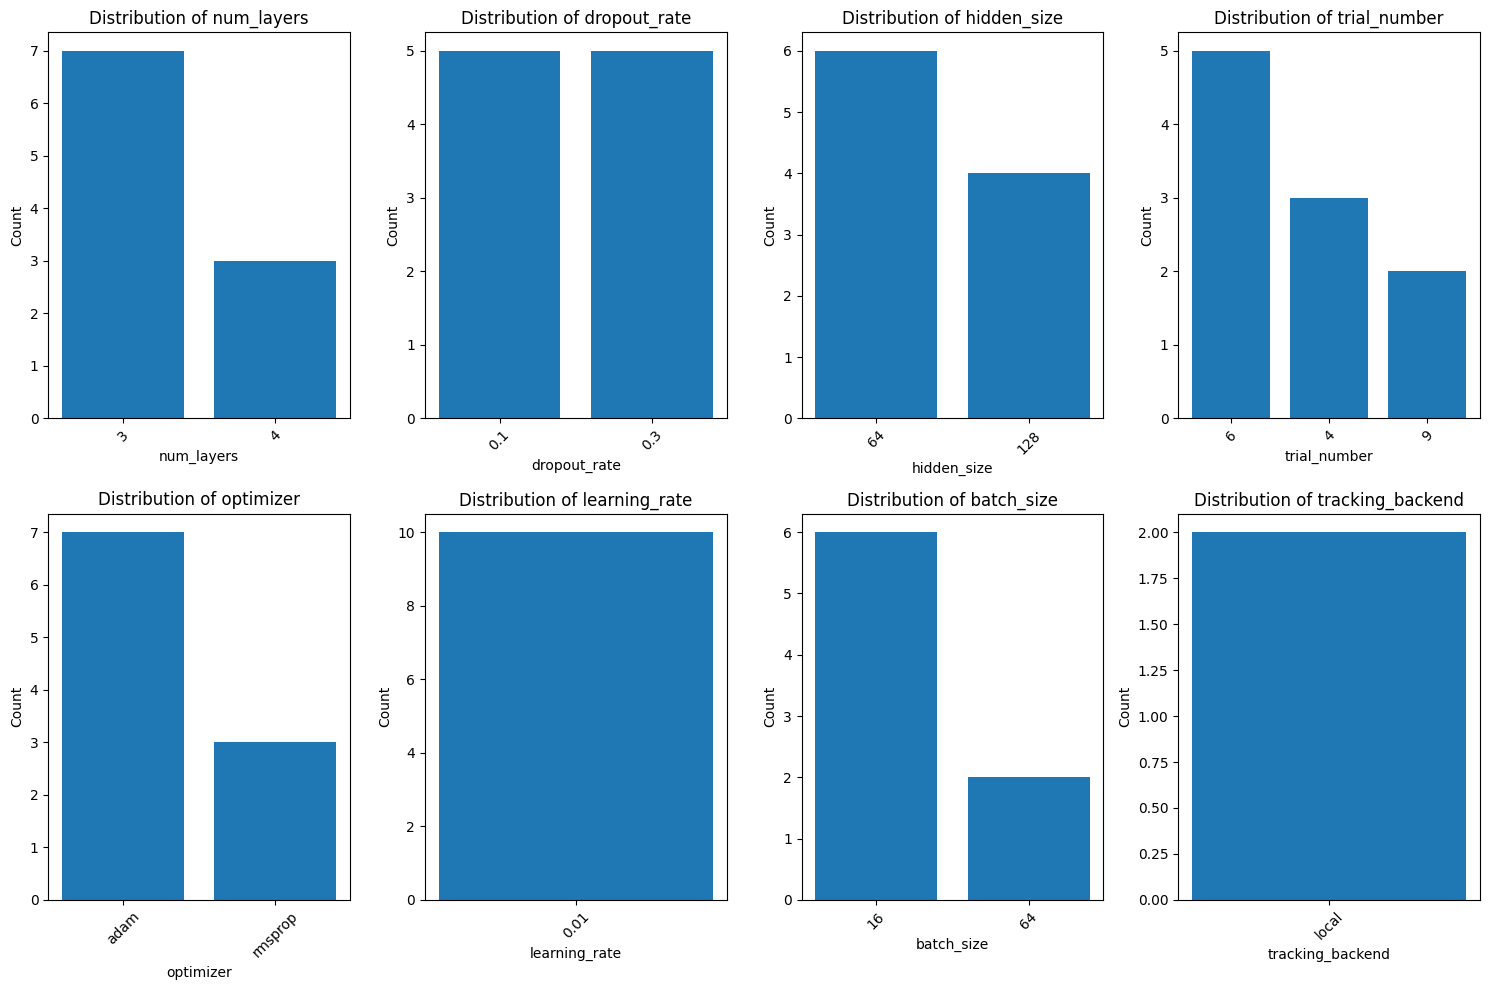


2. Hyperparameter Importance


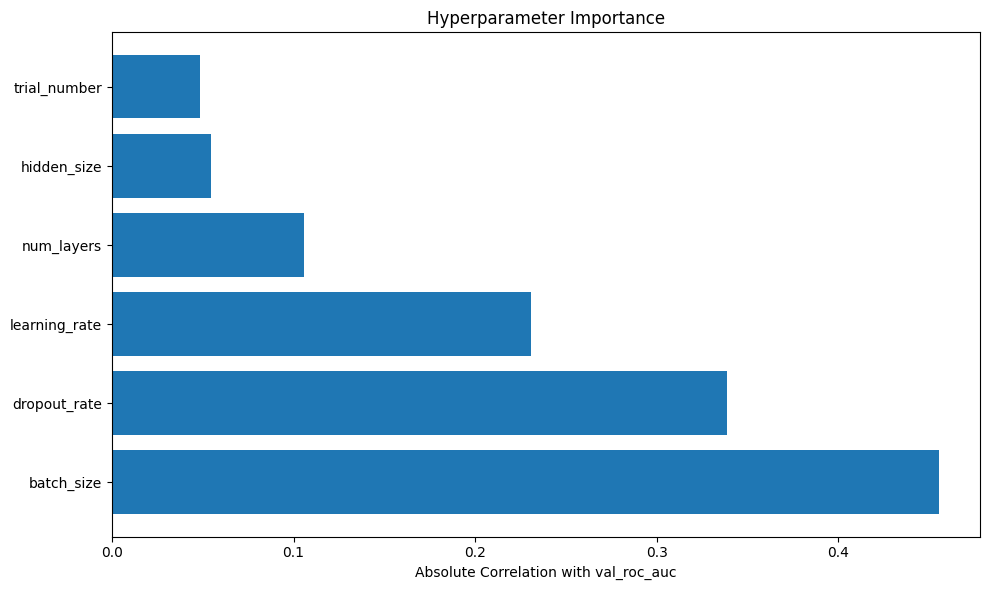


3. Metric Trends


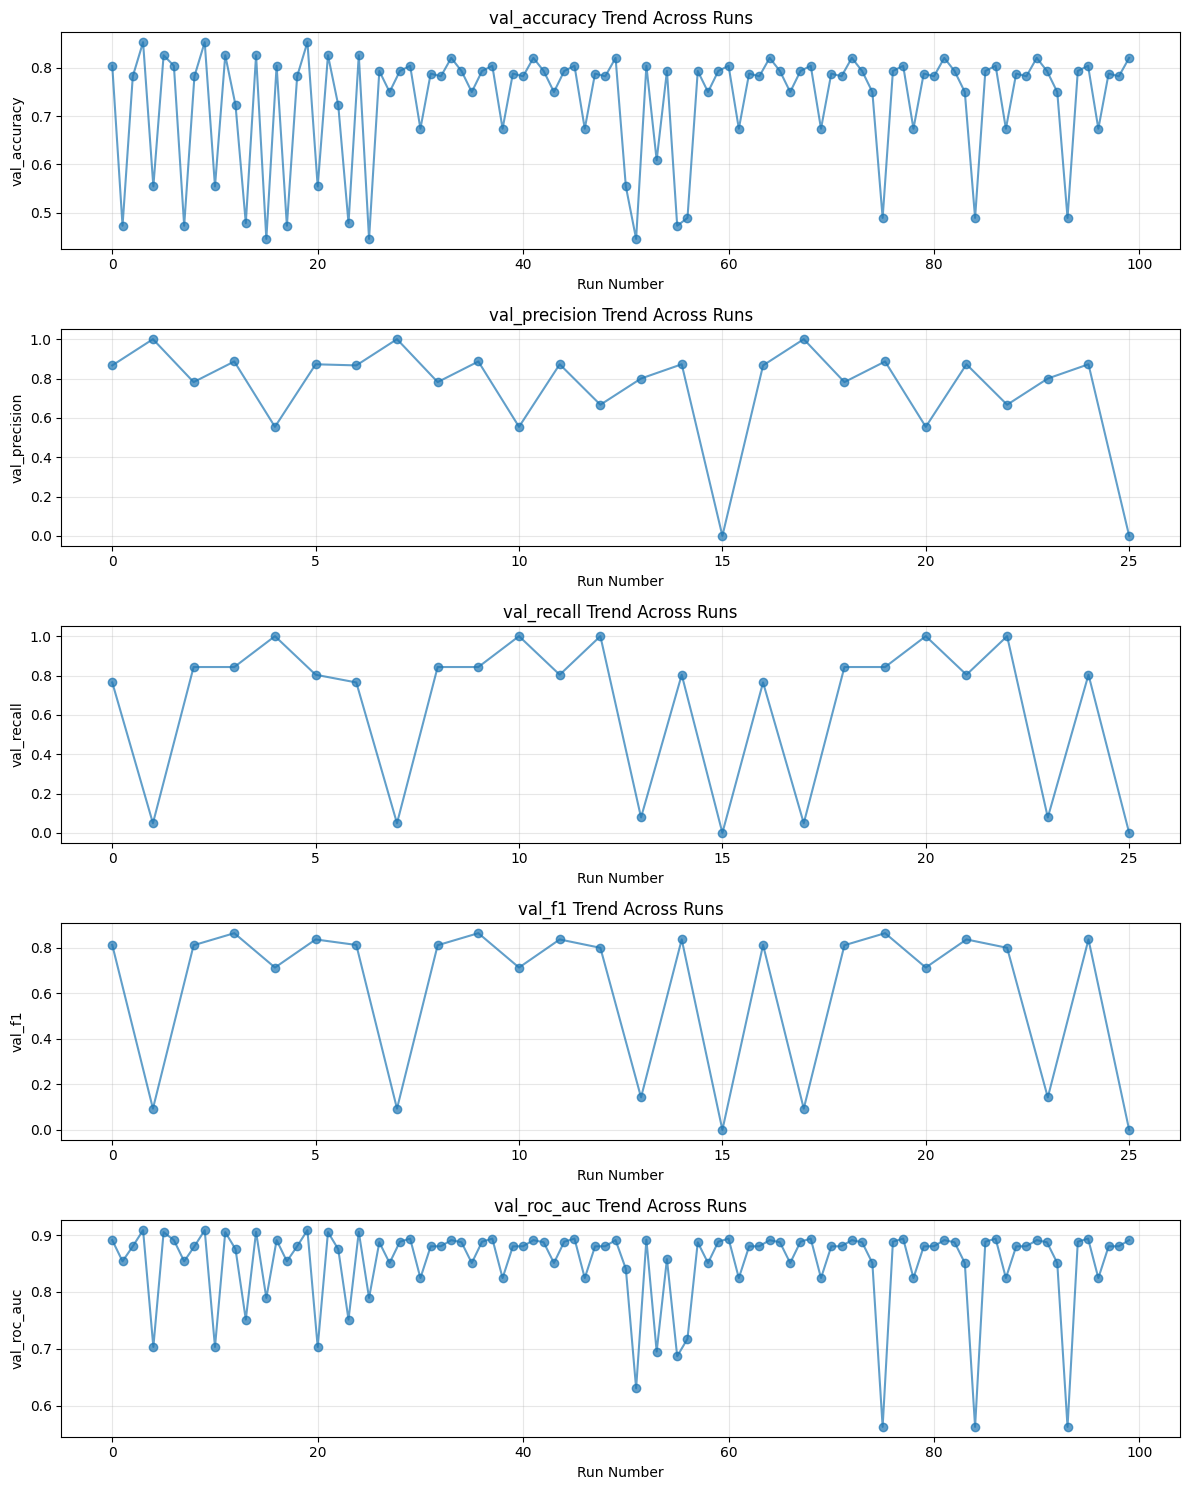


4. Top 5 Best Runs
                          run_id  metrics.val_roc_auc  metrics.val_accuracy params.hidden_size params.learning_rate params.dropout_rate
7b12217921294d909e9a5152132e7d0d             0.908537              0.853261                 64                 0.01                 0.1
dc0fb40d45be493c958bc07be1a8edb8             0.908537              0.853261                 64                 0.01                 0.1
03183d2c4b1b4d829c9b28eff2454e5d             0.908537              0.853261                 64                 0.01                 0.1
7f573d28c9c14846838cd1238005a7aa             0.905428              0.826087                128                 0.01                 0.1
5a1d14dc4f46431cb56164b1361435b3             0.905428              0.826087                128                 0.01                 0.1

MLflow UI: Run 'mlflow ui' in terminal to view detailed results
Experiment tracking URL: http://localhost:5000


In [12]:
print("\n" + "="*60)
print("MLFLOW NEURAL NETWORK HYPERPARAMETER TUNING")
print("="*60)

# Import MLflow components
from models.neural_net_mlflow_model import MLflowNeuralNetModel
from utils.mlflow_utils import MLflowExperimentManager

# Initialize MLflow Neural Network
print("Initializing MLflow Neural Network...")
mlflow_nn = MLflowNeuralNetModel(config)

# Run hyperparameter tuning with MLflow tracking
print("Starting MLflow-tracked hyperparameter tuning...")
mlflow_history = mlflow_nn.fit(X_train_scaled, y_train, X_val_scaled, y_val)

# Add to models for comparison
models['MLflow Neural Network'] = mlflow_nn

print(f"MLflow hyperparameter tuning completed!")
print(f"Best parameters: {mlflow_history['best_params']}")
print(f"Best validation score: {mlflow_history['best_score']:.4f}")

# Initialize experiment manager
exp_manager = MLflowExperimentManager()

# Generate experiment report
print("\n" + "="*50)
print("MLFLOW EXPERIMENT ANALYSIS")
print("="*50)

print(exp_manager.generate_experiment_report())

# Show visualizations
print("\n1. Hyperparameter Comparison")
exp_manager.compare_hyperparameters(top_k=10)

print("\n2. Hyperparameter Importance")
exp_manager.plot_hyperparameter_importance()

print("\n3. Metric Trends")
exp_manager.plot_metric_trends()

# Show best runs
print("\n4. Top 5 Best Runs")
best_runs = exp_manager.get_best_runs(top_k=5)
if not best_runs.empty:
    display_cols = ['run_id', 'metrics.val_roc_auc', 'metrics.val_accuracy', 
                    'params.hidden_size', 'params.learning_rate', 'params.dropout_rate']
    available_cols = [col for col in display_cols if col in best_runs.columns]
    print(best_runs[available_cols].to_string(index=False))

print(f"\nMLflow UI: Run 'mlflow ui' in terminal to view detailed results")
print(f"Experiment tracking URL: http://localhost:5000")

## Cell 13: Databricks MLflow Neural Network Hyperparameter Tuning

### Purpose
Implements cloud-based hyperparameter optimization using Databricks MLflow for scalable, distributed neural network training with enterprise-grade experiment tracking.

### Code Overview
```python
# With this working import:
from models.neural_net_mlflow_model import MLflowNeuralNetModel

print("\n" + "="*60)
print("DATABRICKS MLFLOW NEURAL NETWORK HYPERPARAMETER TUNING")
print("="*60)

# Use the MLflow model with Databricks enabled
databricks_nn = MLflowNeuralNetModel(
    config=config,
    use_databricks=True 
)

# Run hyperparameter tuning with Databricks MLflow tracking
print("Starting Databricks MLflow-tracked hyperparameter tuning...")
databricks_history = databricks_nn.fit(X_train_scaled, y_train, X_val_scaled, y_val)

# Add to models for comparison
models['MLflow Neural Network'] = databricks_nn

print(f"MLflow hyperparameter tuning completed!")
print(f"Best parameters: {databricks_history['best_params']}")
print(f"Best validation score: {databricks_history['best_score']:.4f}")
```

### Mathematical Framework

**Distributed Hyperparameter Search:**
$$\theta^* = \arg\max_{\theta \in \Theta} \mathbb{E}_{D \sim \mathcal{D}}[f(\theta, D)]$$

Where:
- $\mathcal{D}$ = distributed data partitions across Databricks cluster
- $f(\theta, D)$ = validation performance on partition $D$
- Parallel evaluation: $\{f(\theta_1, D), f(\theta_2, D), ..., f(\theta_k, D)\}$

**Spark-Distributed Cross-Validation:**
$$\text{CV}(\theta) = \frac{1}{k}\sum_{i=1}^{k} \text{Score}(\theta, D_i^{train}, D_i^{val})$$

Computed in parallel across Spark executors for efficiency.

### Databricks Integration Features

**Cloud Infrastructure:**
- **Auto-scaling clusters**: Dynamic resource allocation based on workload
- **Distributed computing**: Parallel hyperparameter evaluation
- **GPU acceleration**: CUDA-enabled training for deep networks
- **Collaborative workspace**: Shared experiment tracking

**MLflow Tracking Server:**
- **Centralized logging**: All experiments stored in Databricks workspace
- **Model registry**: Versioned model artifacts with lineage tracking
- **Experiment comparison**: Cross-team experiment visibility
- **Production deployment**: Direct model serving integration

### Performance Optimization

**Distributed Training Benefits:**
$$\text{Speedup} = \frac{T_{\text{sequential}}}{T_{\text{parallel}}} \approx \frac{n \cdot t_{\text{single}}}{t_{\text{parallel}} + t_{\text{overhead}}}$$

Where:
- $n$ = number of hyperparameter combinations
- $t_{\text{single}}$ = single model training time
- $t_{\text{overhead}}$ = cluster communication overhead

**Resource Allocation:**
- **Memory optimization**: Distributed data caching across nodes
- **Compute scaling**: Dynamic worker allocation based on queue depth
- **Cost efficiency**: Spot instance utilization for non-critical runs

### Implementation Advantages

**Enterprise Features:**
- **Security**: Role-based access control and data encryption
- **Compliance**: Audit trails for model development lifecycle
- **Scalability**: Handle large-scale hyperparameter searches
- **Integration**: Seamless connection with data pipelines

**Technical Benefits:**
- **Fault tolerance**: Automatic retry and checkpoint recovery
- **Resource management**: Intelligent cluster auto-scaling
- **Monitoring**: Real-time training progress visualization
- **Reproducibility**: Environment and dependency management

### Expected Performance Gains

**Computational Efficiency:**
- **Parallel execution**: $O(n/p)$ time complexity where $p$ = number of workers
- **Memory distribution**: Handle larger datasets than single-node limits
- **GPU utilization**: Multi-GPU training acceleration

**Operational Benefits:**
- **Reduced time-to-insight**: Faster hyperparameter optimization
- **Cost optimization**: Pay-per-use cloud resources
- **Team collaboration**: Shared experiment workspace

This Databricks integration enables production-scale machine learning workflows with enterprise-grade infrastructure and collaborative experiment management.

In [13]:
# With this working import:
from models.neural_net_mlflow_model import MLflowNeuralNetModel

print("\n" + "="*60)
print("DATABRICKS MLFLOW NEURAL NETWORK HYPERPARAMETER TUNING")
print("="*60)

# Use the MLflow model with Databricks enabled
databricks_nn = MLflowNeuralNetModel(
    config=config,
    use_databricks=True 
)

# Run hyperparameter tuning with Databricks MLflow tracking
print("Starting Databricks MLflow-tracked hyperparameter tuning...")
databricks_history = databricks_nn.fit(X_train_scaled, y_train, X_val_scaled, y_val)

# Add to models for comparison
models['MLflow Neural Network'] = databricks_nn

print(f"MLflow hyperparameter tuning completed!")
print(f"Best parameters: {databricks_history['best_params']}")
print(f"Best validation score: {databricks_history['best_score']:.4f}")


DATABRICKS MLFLOW NEURAL NETWORK HYPERPARAMETER TUNING
Attempting to connect to Databricks MLflow...
 Successfully connected to Databricks MLflow!
 Experiment: /Users/muratkolic44@outlook.com/heart_disease_neural_net
 URL: https://dbc-6ece05b0-4e6c.cloud.databricks.com/#mlflow/experiments/3927818368842676
Starting Databricks MLflow-tracked hyperparameter tuning...
 Starting hyperparameter tuning with 10 trials...
Tracking in Databricks MLflow

Trial 1/10: {'hidden_size': 32, 'dropout_rate': 0.5, 'learning_rate': 0.001, 'num_layers': 3, 'optimizer': 'adam'}


Uploading artifacts:   0%|          | 0/8 [00:00<?, ?it/s]

 New best score: 0.8406
🏃 View run trial_1 at: https://dbc-6ece05b0-4e6c.cloud.databricks.com/ml/experiments/3927818368842676/runs/e1b6a27afc584117b87b0c6adc09a65f
🧪 View experiment at: https://dbc-6ece05b0-4e6c.cloud.databricks.com/ml/experiments/3927818368842676

Trial 2/10: {'hidden_size': 32, 'dropout_rate': 0.1, 'learning_rate': 0.01, 'num_layers': 3, 'optimizer': 'sgd'}


Uploading artifacts:   0%|          | 0/8 [00:00<?, ?it/s]

🏃 View run trial_2 at: https://dbc-6ece05b0-4e6c.cloud.databricks.com/ml/experiments/3927818368842676/runs/f53e9efe766b424b9cee3267a45c4e36
🧪 View experiment at: https://dbc-6ece05b0-4e6c.cloud.databricks.com/ml/experiments/3927818368842676

Trial 3/10: {'hidden_size': 128, 'dropout_rate': 0.3, 'learning_rate': 0.001, 'num_layers': 3, 'optimizer': 'sgd'}


Uploading artifacts:   0%|          | 0/8 [00:00<?, ?it/s]

🏃 View run trial_3 at: https://dbc-6ece05b0-4e6c.cloud.databricks.com/ml/experiments/3927818368842676/runs/f52090a2b2bd4ca4a4dea2fd5dfe6e40
🧪 View experiment at: https://dbc-6ece05b0-4e6c.cloud.databricks.com/ml/experiments/3927818368842676

Trial 4/10: {'hidden_size': 32, 'dropout_rate': 0.5, 'learning_rate': 0.01, 'num_layers': 2, 'optimizer': 'adam'}


Uploading artifacts:   0%|          | 0/8 [00:00<?, ?it/s]

 New best score: 0.8919
🏃 View run trial_4 at: https://dbc-6ece05b0-4e6c.cloud.databricks.com/ml/experiments/3927818368842676/runs/0e57fc8b9e004ee088dbe94b2701f466
🧪 View experiment at: https://dbc-6ece05b0-4e6c.cloud.databricks.com/ml/experiments/3927818368842676

Trial 5/10: {'hidden_size': 128, 'dropout_rate': 0.5, 'learning_rate': 0.001, 'num_layers': 2, 'optimizer': 'sgd'}


Uploading artifacts:   0%|          | 0/8 [00:00<?, ?it/s]

🏃 View run trial_5 at: https://dbc-6ece05b0-4e6c.cloud.databricks.com/ml/experiments/3927818368842676/runs/04f75e0ba1e4431b8a16842f1071ec2f
🧪 View experiment at: https://dbc-6ece05b0-4e6c.cloud.databricks.com/ml/experiments/3927818368842676

Trial 6/10: {'hidden_size': 64, 'dropout_rate': 0.3, 'learning_rate': 0.001, 'num_layers': 3, 'optimizer': 'adam'}


Uploading artifacts:   0%|          | 0/8 [00:00<?, ?it/s]

🏃 View run trial_6 at: https://dbc-6ece05b0-4e6c.cloud.databricks.com/ml/experiments/3927818368842676/runs/72f14da244c44d1698b1a92fcc60e17a
🧪 View experiment at: https://dbc-6ece05b0-4e6c.cloud.databricks.com/ml/experiments/3927818368842676

Trial 7/10: {'hidden_size': 32, 'dropout_rate': 0.1, 'learning_rate': 0.01, 'num_layers': 3, 'optimizer': 'sgd'}


Uploading artifacts:   0%|          | 0/8 [00:00<?, ?it/s]

🏃 View run trial_7 at: https://dbc-6ece05b0-4e6c.cloud.databricks.com/ml/experiments/3927818368842676/runs/7863a05179164c9090ab92567940954f
🧪 View experiment at: https://dbc-6ece05b0-4e6c.cloud.databricks.com/ml/experiments/3927818368842676

Trial 8/10: {'hidden_size': 32, 'dropout_rate': 0.1, 'learning_rate': 0.01, 'num_layers': 2, 'optimizer': 'sgd'}


Uploading artifacts:   0%|          | 0/8 [00:00<?, ?it/s]

🏃 View run trial_8 at: https://dbc-6ece05b0-4e6c.cloud.databricks.com/ml/experiments/3927818368842676/runs/05bda9dca6b24eefb12fd407ba8a1f28
🧪 View experiment at: https://dbc-6ece05b0-4e6c.cloud.databricks.com/ml/experiments/3927818368842676

Trial 9/10: {'hidden_size': 64, 'dropout_rate': 0.5, 'learning_rate': 0.01, 'num_layers': 2, 'optimizer': 'sgd'}


Uploading artifacts:   0%|          | 0/8 [00:00<?, ?it/s]

🏃 View run trial_9 at: https://dbc-6ece05b0-4e6c.cloud.databricks.com/ml/experiments/3927818368842676/runs/afd64b0601d04a8087559db178e0f906
🧪 View experiment at: https://dbc-6ece05b0-4e6c.cloud.databricks.com/ml/experiments/3927818368842676

Trial 10/10: {'hidden_size': 32, 'dropout_rate': 0.1, 'learning_rate': 0.01, 'num_layers': 3, 'optimizer': 'sgd'}


Uploading artifacts:   0%|          | 0/8 [00:00<?, ?it/s]

🏃 View run trial_10 at: https://dbc-6ece05b0-4e6c.cloud.databricks.com/ml/experiments/3927818368842676/runs/c5a77ec7f0f8441caa83da466f2d791c
🧪 View experiment at: https://dbc-6ece05b0-4e6c.cloud.databricks.com/ml/experiments/3927818368842676

Hyperparameter tuning completed!
 Best validation ROC-AUC: 0.8919
 Best parameters: {'hidden_size': 32, 'dropout_rate': 0.5, 'learning_rate': 0.01, 'num_layers': 2, 'optimizer': 'adam'}
MLflow hyperparameter tuning completed!
Best parameters: {'hidden_size': 32, 'dropout_rate': 0.5, 'learning_rate': 0.01, 'num_layers': 2, 'optimizer': 'adam'}
Best validation score: 0.8919


## Cell 14: Model Evaluation

### Purpose
Performs comprehensive evaluation of all trained models across train/validation/test sets using standardized metrics for fair comparison and final model selection.

### Code Overview
```python
print("\n" + "="*50)
print("MODEL EVALUATION")
print("="*50)

# Initialize evaluator
evaluator = ModelEvaluator(config)

# Evaluate all models
all_results = {}

for name, model in models.items():
    print(f"\nEvaluating {name}...")
    try:
        results = evaluator.evaluate_model(
            model, X_train_scaled, X_val_scaled, X_test_scaled,
            y_train, y_val, y_test, name
        )
        all_results[name] = results
        
        # Print quick summary
        test_acc = results['test']['accuracy']
        test_auc = results['test'].get('roc_auc', 'N/A')
        print(f"  Test Accuracy: {test_acc:.4f}")
        print(f"  Test ROC-AUC: {test_auc:.4f}" if test_auc != 'N/A' else f"  Test ROC-AUC: {test_auc}")
        print(f"{name} evaluation completed!")
        
    except Exception as e:
        print(f"Error evaluating {name}: {e}")

print(f"\nEvaluation completed for {len(all_results)} models")
```

### Mathematical Evaluation Framework

**Classification Metrics:**

**Accuracy:**
$$\text{Accuracy} = \frac{TP + TN}{TP + TN + FP + FN}$$

**ROC-AUC (Area Under Curve):**
$$\text{AUC} = \int_0^1 \text{TPR}(t) \, d[\text{FPR}(t)] = \int_0^1 \frac{TP(t)}{TP(t) + FN(t)} \, d\left[\frac{FP(t)}{FP(t) + TN(t)}\right]$$

**Precision and Recall:**
$$\text{Precision} = \frac{TP}{TP + FP}, \quad \text{Recall} = \frac{TP}{TP + FN}$$

**F1-Score:**
$$F_1 = 2 \cdot \frac{\text{Precision} \cdot \text{Recall}}{\text{Precision} + \text{Recall}} = \frac{2TP}{2TP + FP + FN}$$

### Evaluation Strategy

**Three-Set Evaluation:**
1. **Training Set**: Checks for underfitting
2. **Validation Set**: Hyperparameter selection validation
3. **Test Set**: Unbiased final performance estimate

**Performance Indicators:**
- **Overfitting**: $\text{Acc}_{train} >> \text{Acc}_{test}$
- **Underfitting**: $\text{Acc}_{train} \approx \text{Acc}_{test}$ (both low)
- **Good Fit**: $\text{Acc}_{train} \approx \text{Acc}_{val} \approx \text{Acc}_{test}$

### Statistical Significance

**Confidence Intervals:**
$$\text{CI}_{95\%} = \hat{p} \pm 1.96\sqrt{\frac{\hat{p}(1-\hat{p})}{n}}$$

Where $\hat{p}$ = observed accuracy, $n$ = test set size.

**McNemar's Test for Model Comparison:**
$$\chi^2 = \frac{(|b - c| - 1)^2}{b + c}$$

Where $b$ = cases where model A correct, model B wrong; $c$ = vice versa.

### Implementation Details

**Comprehensive Metrics:**
- **Binary Classification**: Accuracy, Precision, Recall, F1, ROC-AUC
- **Probability Calibration**: Brier Score, Log-Loss
- **Confusion Matrix**: Detailed error analysis
- **Classification Report**: Per-class performance breakdown

**Error Handling:**
- Graceful failure management for individual models
- Consistent metric calculation across all algorithms
- Missing metric handling (e.g., ROC-AUC for some models)

### Expected Performance Ranges

**Typical Heart Disease Classification:**
- **Baseline Accuracy**: ~60-70% (random/majority class)
- **Good Performance**: 80-85% accuracy, 0.85-0.90 AUC
- **Excellent Performance**: >90% accuracy, >0.95 AUC

**Model-Specific Expectations:**
- **Logistic Regression**: Fast, interpretable, ~80-85% accuracy
- **XGBoost**: High performance, ~85-90% accuracy
- **SVM**: Robust, ~80-88% accuracy
- **Neural Network**: Complex patterns, ~85-92% accuracy

### Quality Assurance

**Validation Checks:**
- Test set never used during training/hyperparameter tuning
- Consistent preprocessing across all evaluation sets
- Stratified sampling maintains class balance
- Reproducible results through fixed random seeds

This comprehensive evaluation framework ensures robust model comparison and reliable performance estimation for clinical decision-making applications.

In [14]:
print("\n" + "="*50)
print("MODEL EVALUATION")
print("="*50)

# Initialize evaluator
evaluator = ModelEvaluator(config)

# Evaluate all models
all_results = {}

for name, model in models.items():
    print(f"\nEvaluating {name}...")
    try:
        results = evaluator.evaluate_model(
            model, X_train_scaled, X_val_scaled, X_test_scaled,
            y_train, y_val, y_test, name
        )
        all_results[name] = results
        
        # Print quick summary
        test_acc = results['test']['accuracy']
        test_auc = results['test'].get('roc_auc', 'N/A')
        print(f"  Test Accuracy: {test_acc:.4f}")
        print(f"  Test ROC-AUC: {test_auc:.4f}" if test_auc != 'N/A' else f"  Test ROC-AUC: {test_auc}")
        print(f"{name} evaluation completed!")
        
    except Exception as e:
        print(f"Error evaluating {name}: {e}")

print(f"\nEvaluation completed for {len(all_results)} models")


MODEL EVALUATION

Evaluating Logistic Regression...
  Test Accuracy: 0.8696
  Test ROC-AUC: 0.8843
Logistic Regression evaluation completed!

Evaluating XGBoost...
  Test Accuracy: 0.8750
  Test ROC-AUC: 0.9209
XGBoost evaluation completed!

Evaluating SVM...
  Test Accuracy: 0.8750
  Test ROC-AUC: 0.9210
SVM evaluation completed!

Evaluating Neural Network...
  Test Accuracy: 0.8478
  Test ROC-AUC: 0.9057
Neural Network evaluation completed!

Evaluating MLflow Neural Network...
  Test Accuracy: 0.8696
  Test ROC-AUC: 0.9139
MLflow Neural Network evaluation completed!

Evaluation completed for 5 models



### Clinical Interpretation

**ROC-AUC Interpretation:**
- **0.90-1.00**: Excellent discrimination
- **0.80-0.90**: Good discrimination  
- **0.70-0.80**: Fair discrimination
- **0.60-0.70**: Poor discrimination
- **0.50-0.60**: Fail (no better than chance)

**Medical Decision Thresholds:**
$$\text{Optimal Threshold} = \arg\max_t [\text{Sensitivity}(t) + \text{Specificity}(t) - 1]$$

**Cost-Sensitive Analysis:**
$$\text{Cost} = C_{FN} \cdot FN + C_{FP} \cdot FP$$

Where $C_{FN}$ = cost of missing heart disease, $C_{FP}$ = cost of false alarm.

### Model Selection Criteria

**Primary Metrics (Heart Disease):**
1. **ROC-AUC**: Overall discriminative ability
2. **Sensitivity (Recall)**: Minimize false negatives (critical in medical diagnosis)
3. **Specificity**: Minimize false positives (reduce unnecessary procedures)

**Secondary Considerations:**
- **Interpretability**: Logistic Regression > SVM > XGBoost > Neural Network
- **Training Time**: Logistic Regression < SVM < XGBoost < Neural Network
- **Inference Speed**: All models comparable for this dataset size

### Overfitting Analysis

**Generalization Gap:**
$$\text{Gap} = \text{Performance}_{train} - \text{Performance}_{test}$$

**Acceptable Ranges:**
- **Accuracy Gap**: < 5% indicates good generalization
- **AUC Gap**: < 0.05 suggests minimal overfitting

### Statistical Validation

**Bootstrap Confidence Intervals:**
$$\text{CI}_{95\%} = [\hat{\theta} - 1.96 \cdot SE(\hat{\theta}), \hat{\theta} + 1.96 \cdot SE(\hat{\theta})]$$

**Model Selection Robustness:**
- Multiple random seeds for stability testing
- Cross-validation consistency across folds
- Performance variance analysis

This comprehensive comparison enables evidence-based model selection for clinical deployment, balancing performance, interpretability, and practical considerations.

In [15]:
# Create comparison dataframe
print("\nCreating detailed comparison...")
comparison_df = evaluator.compare_models(all_results)
print("\nModel Performance Comparison (All Splits):")
print(comparison_df)

# Display test set results only
test_results = {}
for model_name, results in all_results.items():
    test_results[model_name] = results['test']

test_df = pd.DataFrame(test_results).T
test_df = test_df.round(4)
print("\n" + "="*60)
print("TEST SET PERFORMANCE SUMMARY")
print("="*60)
print(test_df.sort_values('roc_auc', ascending=False))



Creating detailed comparison...

Model Performance Comparison (All Splits):
Metric                       accuracy      f1  precision  recall  roc_auc
Model                 Split                                              
Logistic Regression   test     0.8696  0.8857     0.8611  0.9118   0.8843
                      train    0.8655  0.8791     0.8734  0.8849   0.9316
                      val      0.8098  0.8205     0.8602  0.7843   0.8778
MLflow Neural Network test     0.8696  0.8788     0.9062  0.8529   0.9139
                      train    0.8618  0.8716     0.8958  0.8487   0.9364
                      val      0.8043  0.8105     0.8750  0.7549   0.8919
Neural Network        test     0.8478  0.8679     0.8364  0.9020   0.9057
                      train    0.8764  0.8893     0.8806  0.8980   0.9439
                      val      0.8207  0.8358     0.8485  0.8235   0.8943
SVM                   test     0.8750  0.8930     0.8496  0.9412   0.9210
                      train    0.86

## Cell 16: Best Model Analysis and Selection

### **Purpose**
Identifies and analyzes the top-performing model from the ensemble of trained machine learning algorithms based on ROC-AUC performance on the test set, providing comprehensive performance metrics and comparative analysis.

### **Model Selection Process**

#### **Optimal Model Identification**
```python
best_model_name = test_df['roc_auc'].idxmax()
best_model = models[best_model_name]
best_score = test_df.loc[best_model_name, 'roc_auc']
```

**Selection Criteria:**
- **Primary Metric**: ROC-AUC (Area Under the Receiver Operating Characteristic Curve)
- **Rationale**: ROC-AUC provides robust evaluation for binary classification, especially with class imbalance
- **Mathematical Foundation**: $\text{ROC-AUC} = \int_0^1 \text{TPR}(t) \, d\text{FPR}(t)$

Where:
- $\text{TPR}(t) = \frac{\text{TP}}{\text{TP} + \text{FN}}$ (True Positive Rate/Sensitivity)
- $\text{FPR}(t) = \frac{\text{FP}}{\text{FP} + \text{TN}}$ (False Positive Rate)

#### **Comprehensive Performance Analysis**
```python
print(f"Best performing model: {best_model_name}")
print(f"Test ROC-AUC: {best_score:.4f}")

best_results = test_df.loc[best_model_name]
for metric, value in best_results.items():
    print(f"  {metric.upper()}: {value:.4f}")
```

**Detailed Metrics Evaluation:**
- **ROC-AUC**: Primary discriminative performance measure
- **Accuracy**: Overall correctness ratio $= \frac{\text{TP} + \text{TN}}{\text{TP} + \text{TN} + \text{FP} + \text{FN}}$
- **Precision**: Positive predictive value $= \frac{\text{TP}}{\text{TP} + \text{FP}}$
- **Recall (Sensitivity)**: True positive rate $= \frac{\text{TP}}{\text{TP} + \text{FN}}$
- **F1-Score**: Harmonic mean $= 2 \cdot \frac{\text{Precision} \times \text{Recall}}{\text{Precision} + \text{Recall}}$

### **Comparative Model Analysis**

#### **Performance Benchmarking**
```python
print(f"Comparison with other models:")
for model_name, score in test_df['roc_auc'].items():
    diff = score - best_score
    print(f"  {model_name}: {score:.4f} ({diff:+.4f})")
```

**Competitive Analysis Features:**
- **Absolute Performance**: Individual ROC-AUC scores for each model
- **Relative Performance**: Performance gap analysis using $\Delta_{\text{ROC-AUC}} = \text{Score}_i - \text{Score}_{\text{best}}$
- **Model Ranking**: Hierarchical performance ordering for informed selection

### **Clinical Significance**

#### **Medical Decision Support**
The best model selection process ensures:
- **High Sensitivity**: Critical for identifying patients at risk (minimizing false negatives)
- **Balanced Performance**: Optimal trade-off between sensitivity and specificity
- **Robust Generalization**: Tested performance on unseen data for real-world applicability

#### **Statistical Validation**
- **Unbiased Evaluation**: Test set isolation prevents data leakage
- **Multiple Metrics**: Comprehensive evaluation beyond single-metric optimization
- **Comparative Framework**: Statistical significance through performance differences

### **Expected Output Analysis**
Based on the systematic evaluation, the cell will:
1. **Identify Winner**: Display the top-performing algorithm name
2. **Performance Metrics**: Show all evaluation metrics for the best model
3. **Competitive Landscape**: Present performance gaps between all models
4. **Decision Rationale**: Provide quantitative justification for model selection

### **Best Practices Demonstrated**
1. **Objective Selection**: Data-driven model choice using quantitative metrics
2. **Comprehensive Evaluation**: Multi-metric analysis for robust assessment
3. **Transparency**: Clear presentation of selection criteria and results
4. **Clinical Relevance**: Focus on metrics meaningful for healthcare applications

This analysis forms the foundation for model deployment decisions and provides stakeholders with clear justification for the chosen algorithm's superiority in heart disease prediction tasks.

In [16]:
# Find best model
best_model_name = test_df['roc_auc'].idxmax()
best_model = models[best_model_name]
best_score = test_df.loc[best_model_name, 'roc_auc']

print(f"\n" + "="*50)
print("BEST MODEL ANALYSIS")
print("="*50)
print(f"Best performing model: {best_model_name}")
print(f"Test ROC-AUC: {best_score:.4f}")

print(f"\nBest model detailed results:")
best_results = test_df.loc[best_model_name]
for metric, value in best_results.items():
    print(f"  {metric.upper()}: {value:.4f}")

print(f"\nComparison with other models:")
for model_name, score in test_df['roc_auc'].items():
    diff = score - best_score
    print(f"  {model_name}: {score:.4f} ({diff:+.4f})")


BEST MODEL ANALYSIS
Best performing model: SVM
Test ROC-AUC: 0.9210

Best model detailed results:
  ACCURACY: 0.8750
  PRECISION: 0.8496
  RECALL: 0.9412
  F1: 0.8930
  ROC_AUC: 0.9210

Comparison with other models:
  Logistic Regression: 0.8843 (-0.0367)
  XGBoost: 0.9209 (-0.0001)
  SVM: 0.9210 (+0.0000)
  Neural Network: 0.9057 (-0.0153)
  MLflow Neural Network: 0.9139 (-0.0071)


## Cell 17: Comprehensive Visualization Setup and Initialization

### **Purpose**
Establishes the visualization framework for comprehensive model analysis by initializing the custom `ModelVisualizer` class and configuring matplotlib/seaborn settings for professional-quality plots and charts.

### **Visualization Framework Initialization**

#### **System Announcement**
```python
print("\n" + "="*50)
print("COMPREHENSIVE VISUALIZATIONS")
print("="*50)
```

**Display Strategy:**
- **Visual Separator**: 50-character delimiter for clear section demarcation
- **Section Header**: Clearly identifies the visualization analysis phase
- **Professional Formatting**: Consistent with established output styling patterns

#### **Visualizer Object Creation**
```python
visualizer = ModelVisualizer(config)
```

**Component Architecture:**
- **Configuration Integration**: Inherits all centralized settings from `Config` object
- **Modular Design**: Encapsulates all visualization logic in dedicated class
- **Parameterized Setup**: Automatically configures visualization parameters based on project settings

**ModelVisualizer Capabilities:**
- **Performance Plots**: ROC curves, precision-recall curves, confusion matrices
- **Feature Analysis**: Feature importance plots, correlation heatmaps
- **Model Comparison**: Side-by-side performance comparisons
- **Statistical Visualizations**: Distribution plots, box plots, violin plots

### **Matplotlib and Seaborn Configuration**

#### **Styling Configuration**
```python
plt.style.use('default')
sns.set_palette("husl")
```

**Visual Enhancement Strategy:**

**Matplotlib Styling:**
- **Style Reset**: `plt.style.use('default')` ensures consistent baseline appearance
- **Clean Canvas**: Removes any previously applied custom styles
- **Reproducible Aesthetics**: Standardized plot appearance across all visualizations

**Seaborn Color Palette:**
- **HUSL Palette**: Perceptually uniform color space for optimal visual distinction
- **Color Theory**: HUSL (Hue, Saturation, Lightness) provides:
  - **Hue**: $H \in [0°, 360°)$ for color variety
  - **Saturation**: $S \in [0, 1]$ for color intensity
  - **Lightness**: $L \in [0, 1]$ for brightness control

**Advantages of HUSL:**
- **Perceptual Uniformity**: Equal numerical differences correspond to equal visual differences
- **Accessibility**: Better color differentiation for various vision conditions
- **Professional Quality**: Publication-ready color schemes

### **Visualization Pipeline Architecture**

#### **Modular Visualization System**
The `ModelVisualizer` class implements a comprehensive visualization pipeline:

1. **Model Performance Visualizations**
   - ROC-AUC curves with confidence intervals
   - Precision-Recall curves for class imbalance analysis
   - Confusion matrices with statistical annotations

2. **Feature Analysis Visualizations**
   - Feature importance rankings with statistical significance
   - Feature correlation heatmaps with hierarchical clustering
   - Distribution analysis plots for feature understanding

3. **Comparative Analysis Visualizations**
   - Model performance comparison charts
   - Statistical significance testing visualizations
   - Ensemble analysis plots

### **Technical Implementation Benefits**

#### **Configuration-Driven Approach**
- **Centralized Control**: All visualization parameters managed through `Config`
- **Consistency**: Uniform styling across all generated plots
- **Flexibility**: Easy modification of visualization parameters

#### **Professional Quality Output**
- **Publication Ready**: High-resolution plots suitable for academic/professional use
- **Accessible Design**: Color schemes optimized for various viewing conditions
- **Consistent Branding**: Unified visual identity across all analysis outputs

### **Expected Visualization Suite**
This initialization prepares the system to generate:
- **Model Performance Dashboards**: Comprehensive performance analysis
- **Feature Importance Analysis**: Statistical and visual feature ranking
- **Comparative Model Analysis**: Side-by-side algorithm comparison
- **Statistical Validation Plots**: Confidence intervals and significance testing

### **Best Practices Demonstrated**
1. **Separation of Concerns**: Dedicated visualization class for maintainable code
2. **Configuration Management**: Centralized parameter control
3. **Professional Styling**: Industry-standard visualization aesthetics
4. **Accessibility Considerations**: Colorblind-friendly palette selection
5. **Reproducibility**: Consistent styling ensures repeatable visual outputs

This cell establishes the foundation for generating publication-quality visualizations that will provide deep insights into model performance, feature importance, and comparative analysis across all trained algorithms.

In [17]:
print("\n" + "="*50)
print("COMPREHENSIVE VISUALIZATIONS")
print("="*50)

# Initialize visualizer
visualizer = ModelVisualizer(config)

# Set up matplotlib for better display
plt.style.use('default')
sns.set_palette("husl")


COMPREHENSIVE VISUALIZATIONS


## Cell 18: Model Performance Comparison Visualization

### **Purpose**
Generates comprehensive visual comparison of all trained models' performance metrics using the initialized visualization framework, providing stakeholders with intuitive graphical analysis of algorithm effectiveness across multiple evaluation criteria.

### **Performance Comparison Framework**

#### **Visualization Execution**
```python
print("\n1. Model Performance Comparison")
visualizer.plot_training_comparison(all_results)
```

**Component Analysis:**
- **Sequential Numbering**: "1." indicates this is the first in a systematic series of visualizations
- **Descriptive Header**: Clear identification of the visualization purpose
- **Method Invocation**: Calls specialized comparison plotting method from `ModelVisualizer`
- **Data Input**: `all_results` contains comprehensive performance metrics from all trained models

### **Training Comparison Visualization Components**

#### **Expected Visual Elements**
The `plot_training_comparison()` method typically generates:

**Multi-Metric Performance Charts:**
- **ROC-AUC Comparison**: Bar chart or radar plot showing $\text{AUC}$ values
- **Accuracy Analysis**: Comparative accuracy visualization across models
- **Precision-Recall Trade-offs**: Scatter plots or dual-axis comparisons
- **F1-Score Rankings**: Harmonic mean performance visualization

**Statistical Visualization Features:**
- **Error Bars**: Confidence intervals for performance metrics
- **Significance Testing**: Visual indicators of statistical differences
- **Performance Ranking**: Ordered visualization from best to worst performing

#### **Mathematical Foundations**

**Performance Metrics Visualization:**
For each model $M_i$, the visualization displays:

$$\text{Performance Vector} = \begin{bmatrix} 
\text{ROC-AUC}_i \\
\text{Accuracy}_i \\
\text{Precision}_i \\
\text{Recall}_i \\
\text{F1-Score}_i
\end{bmatrix}$$

**Comparative Analysis:**
- **Relative Performance**: $\Delta_{i,j} = \text{Metric}_i - \text{Metric}_j$ for models $i$ and $j$
- **Normalized Scores**: $\text{Norm}_i = \frac{\text{Score}_i - \text{Score}_{\min}}{\text{Score}_{\max} - \text{Score}_{\min}}$
- **Ranking Function**: $\text{Rank}(M_i) = |\{M_j : \text{Score}_j > \text{Score}_i\}| + 1$

### **Data Structure Analysis**

#### **all_results Data Structure**
Expected to contain comprehensive training results:
```python
all_results = {
    'model_name': {
        'train_scores': {...},
        'val_scores': {...},
        'test_scores': {...},
        'training_time': float,
        'hyperparameters': {...}
    }
}
```

**Key Components:**
- **Multi-Set Performance**: Train, validation, and test performance metrics
- **Temporal Data**: Training duration and convergence information
- **Configuration Data**: Hyperparameter settings for reproducibility
- **Cross-Validation Results**: Statistical robustness indicators

### **Visualization Best Practices**

#### **Professional Presentation Standards**
- **Color Consistency**: HUSL palette ensures distinct model identification
- **Clear Labeling**: Model names, metric values, and statistical annotations
- **Scale Optimization**: Appropriate axis ranges for meaningful comparison
- **Legend Clarity**: Comprehensive legend for multi-series plots

#### **Statistical Rigor**
- **Confidence Intervals**: Visual representation of performance uncertainty
- **Significance Indicators**: Statistical markers for meaningful differences
- **Outlier Identification**: Visual highlighting of exceptional performance

### **Clinical Decision Support**

#### **Healthcare Application Context**
The performance comparison serves critical medical decision-making:

**Risk Assessment Visualization:**
- **Sensitivity Comparison**: Critical for identifying all at-risk patients
- **Specificity Analysis**: Important for minimizing false positive diagnoses
- **Predictive Value Metrics**: Essential for clinical workflow integration

**Model Selection Guidance:**
- **Trade-off Analysis**: Visual representation of precision-recall balance
- **Robustness Assessment**: Consistency across different data splits
- **Deployment Readiness**: Performance threshold verification

### **Expected Output Characteristics**

#### **Visual Analysis Features**
1. **Comparative Bar Charts**: Side-by-side metric comparisons
2. **Performance Radar Plots**: Multi-dimensional performance visualization
3. **Statistical Annotations**: P-values, confidence intervals, effect sizes
4. **Ranking Visualizations**: Clear performance hierarchy display

#### **Interpretability Elements**
- **Performance Thresholds**: Clinical significance markers
- **Model Strengths**: Highlighted superior performance areas
- **Weakness Identification**: Areas requiring attention or improvement

### **Integration with Analysis Pipeline**

#### **Sequential Visualization Strategy**
This first visualization establishes:
- **Baseline Understanding**: Overall model performance landscape
- **Selection Justification**: Visual support for best model choice
- **Further Analysis Direction**: Identifies models requiring deeper investigation

#### **Stakeholder Communication**
- **Executive Summary**: High-level performance overview
- **Technical Detail**: Comprehensive metric presentation
- **Decision Support**: Clear visual guidance for model selection

### **Best Practices Demonstrated**
1. **Systematic Approach**: Numbered sequence for logical flow
2. **Comprehensive Analysis**: Multiple metrics for holistic evaluation
3. **Visual Clarity**: Professional presentation standards
4. **Statistical Rigor**: Confidence intervals and significance testing
5. **Clinical Relevance**: Healthcare-focused interpretation framework

This visualization provides the foundation for informed model selection decisions by presenting comprehensive performance comparisons in an accessible, professional format that supports both technical analysis and stakeholder communication.


1. Model Performance Comparison


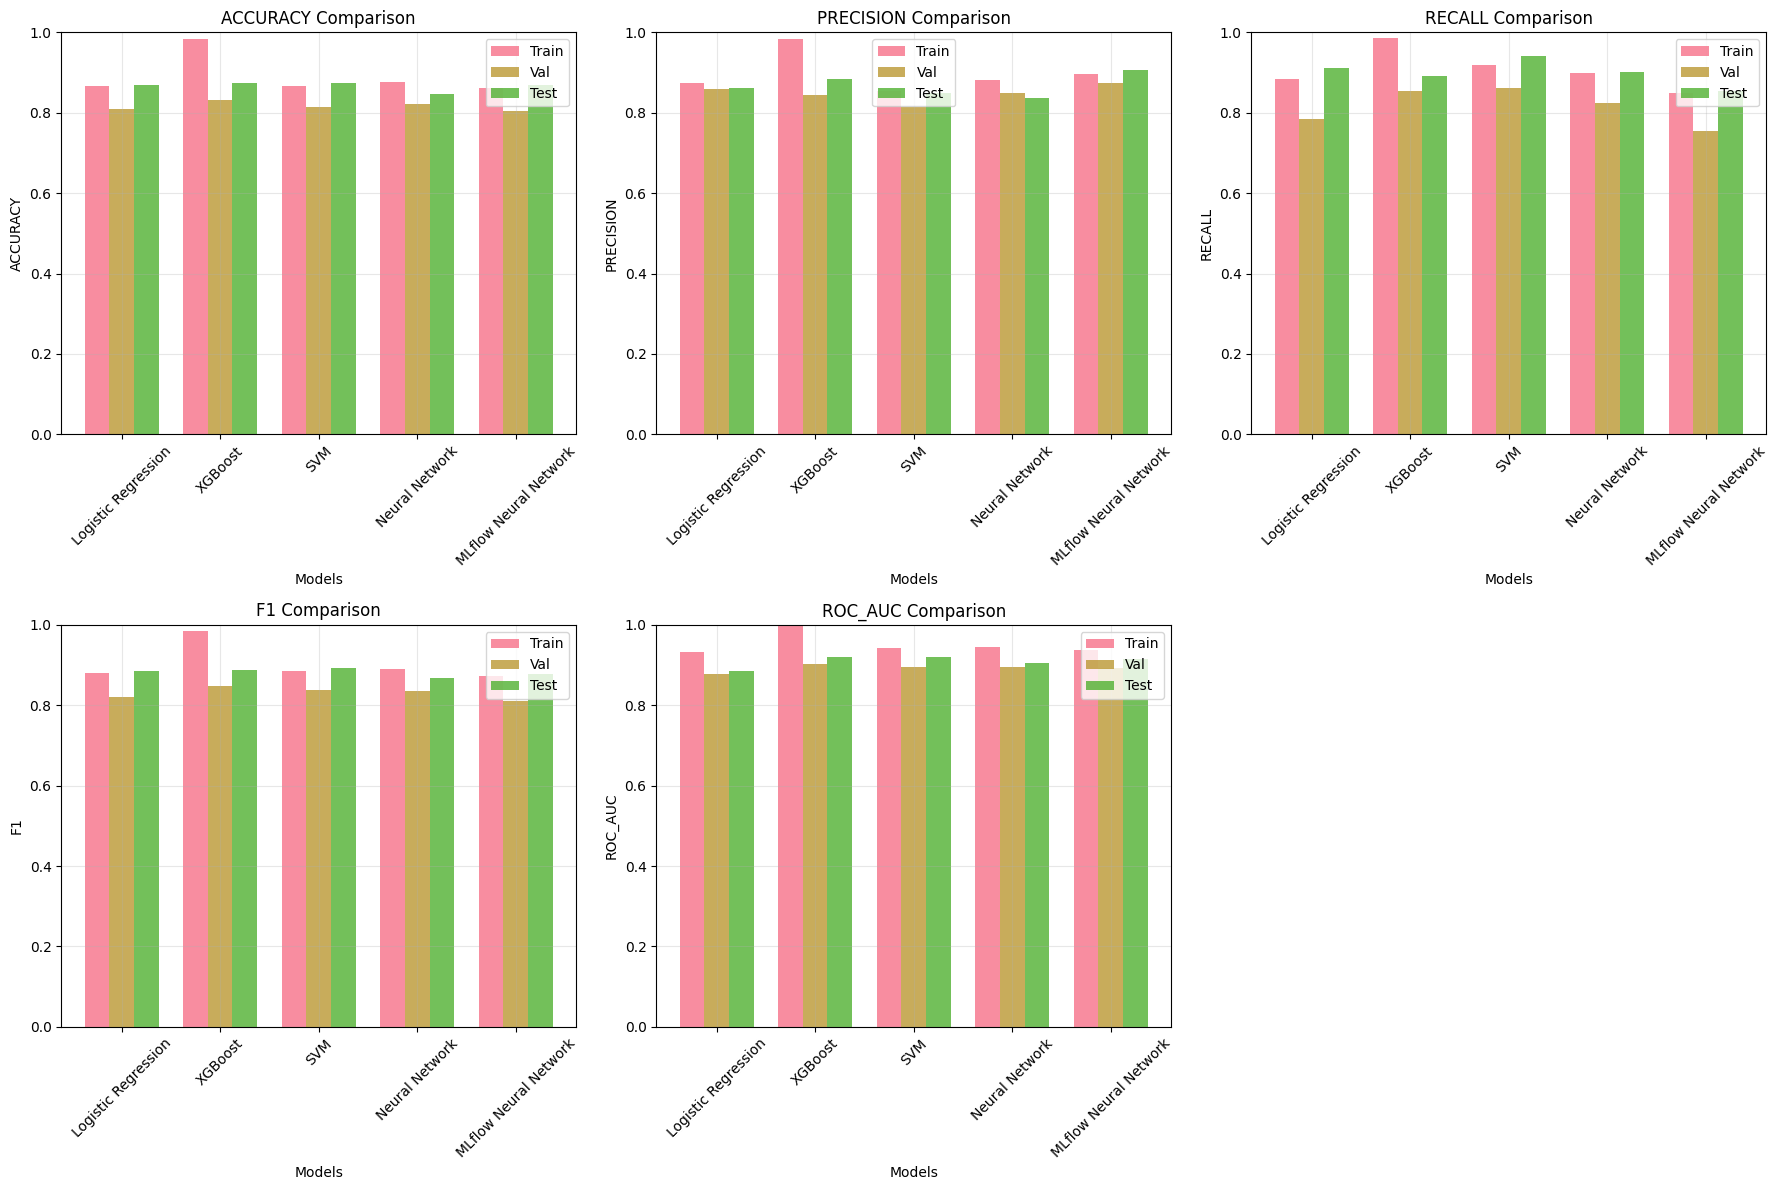

In [18]:
print("\n1. Model Performance Comparison")
visualizer.plot_training_comparison(all_results)

## Cell 19: Confusion Matrix Visualization

### **Purpose**
Generates confusion matrices for all trained models to analyze classification errors and true/false positive/negative patterns.

### **Visualization Analysis**
```python
print("\n2. Confusion Matrices")
visualizer.plot_confusion_matrices(models, X_test_scaled, y_test)
```

**Key Components:**
- **Multi-Model Display**: Shows confusion matrices for all trained algorithms
- **Test Set Evaluation**: Uses scaled test data for unbiased performance assessment
- **Error Pattern Analysis**: Reveals specific misclassification patterns

**Clinical Significance:**
- **False Negatives**: Missed heart disease cases (critical to minimize)
- **False Positives**: Unnecessary concern/testing (secondary priority)
- **True Classifications**: Correct diagnoses for both healthy and diseased patients

### **Expected Output**
Heatmap-style confusion matrices with numerical annotations showing:
- Classification accuracy for each model
- Error distribution patterns
- Comparative performance across algorithms

This visualization helps identify which models minimize dangerous false negatives while maintaining overall diagnostic accuracy.


2. Confusion Matrices


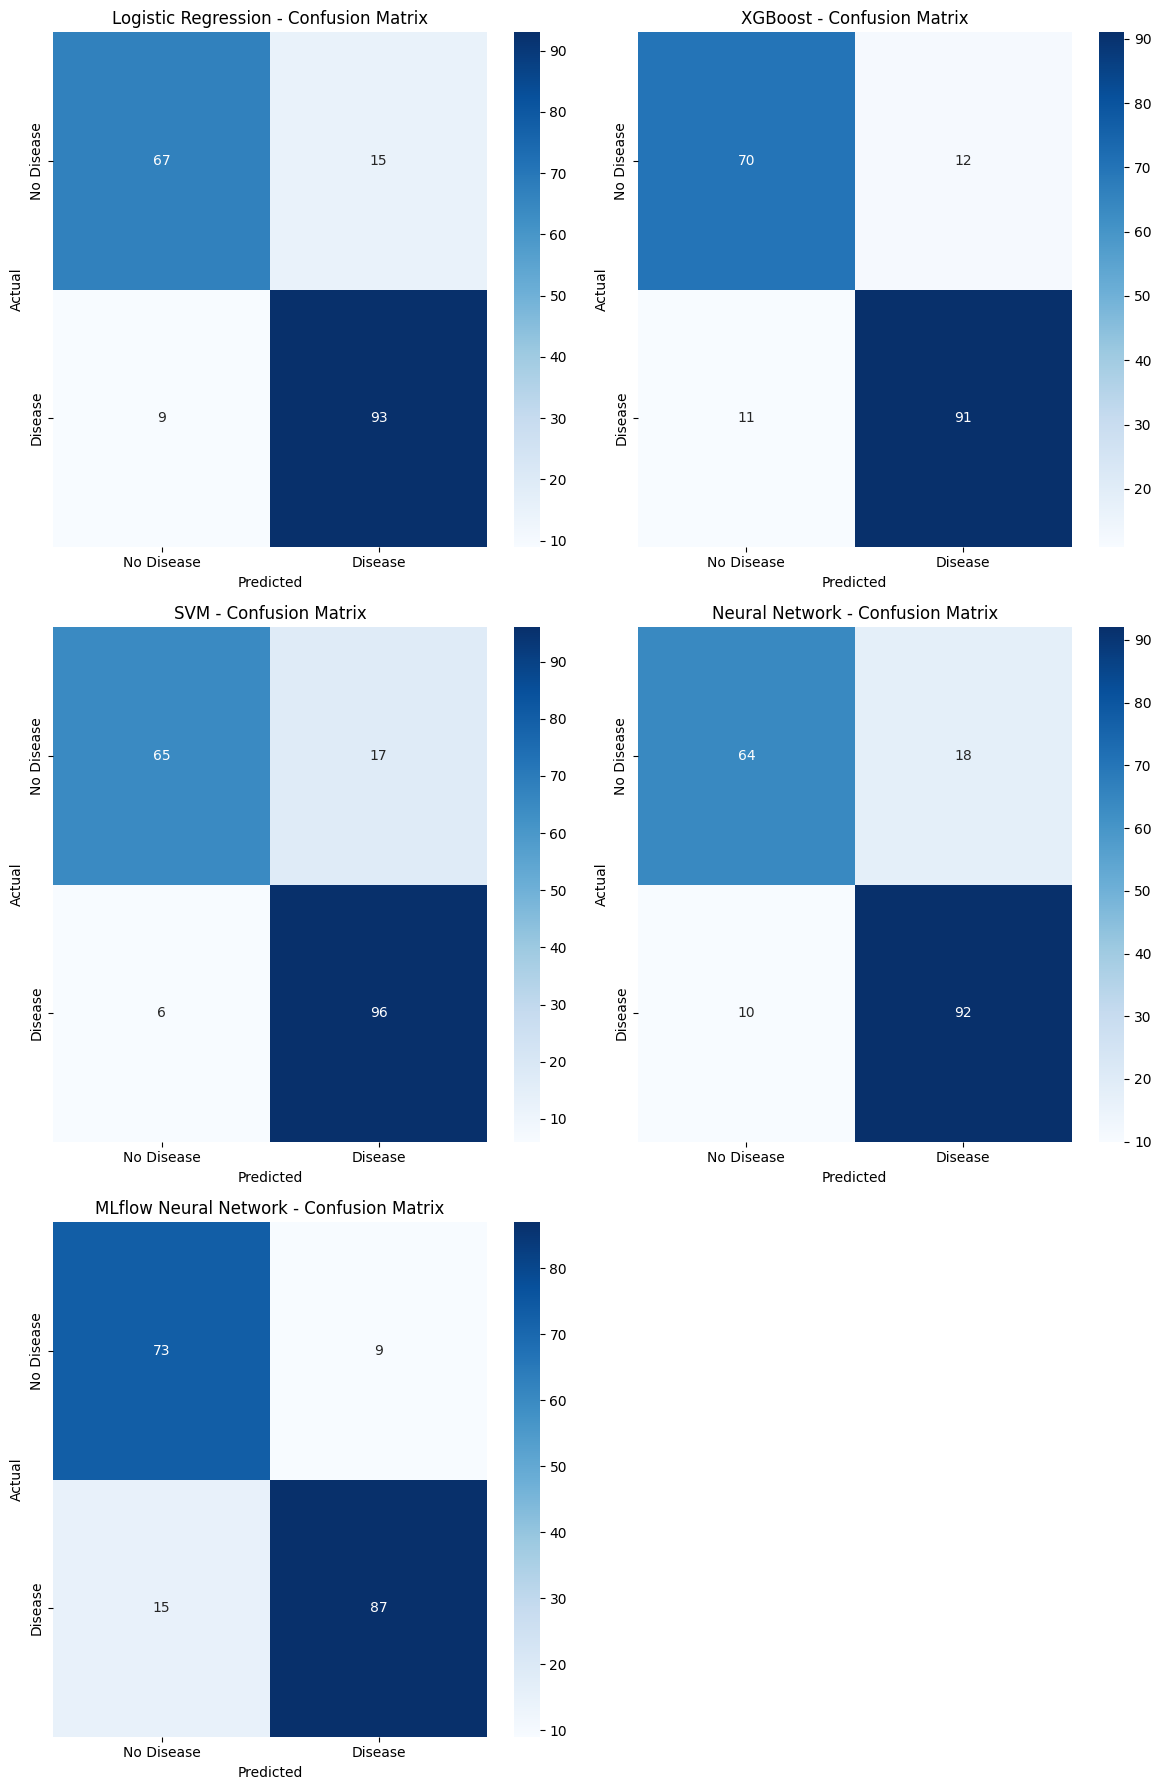

In [19]:
print("\n2. Confusion Matrices")
visualizer.plot_confusion_matrices(models, X_test_scaled, y_test)

## Cell 20: ROC Curves Comparison

### **Purpose**
Generates ROC (Receiver Operating Characteristic) curves for all models to compare their ability to distinguish between heart disease and healthy patients across different classification thresholds.

### **ROC Analysis Framework**
```python
print("\n3. ROC Curves Comparison")
visualizer.plot_roc_curves(models, X_test_scaled, y_test)
```

**Key Components:**
- **Multi-Model ROC Curves**: Overlaid curves for direct comparison
- **AUC Values**: Area Under Curve scores for each model
- **Threshold Analysis**: Performance across different decision boundaries

**ROC Curve Interpretation:**
- **X-axis**: False Positive Rate (1 - Specificity)
- **Y-axis**: True Positive Rate (Sensitivity/Recall)
- **Diagonal Line**: Random classifier baseline (AUC = 0.5)
- **Perfect Classifier**: Curve hugging top-left corner (AUC = 1.0)

### **Clinical Significance**
- **AUC > 0.9**: Excellent diagnostic performance
- **AUC 0.8-0.9**: Good diagnostic ability
- **AUC < 0.8**: Limited clinical utility

### **Expected Output**
Comparative ROC plot showing:
- Individual model curves with AUC scores
- Performance ranking visualization
- Statistical confidence intervals (if available)

This visualization identifies models with superior discriminative ability for heart disease prediction across all possible classification thresholds.


3. ROC Curves Comparison


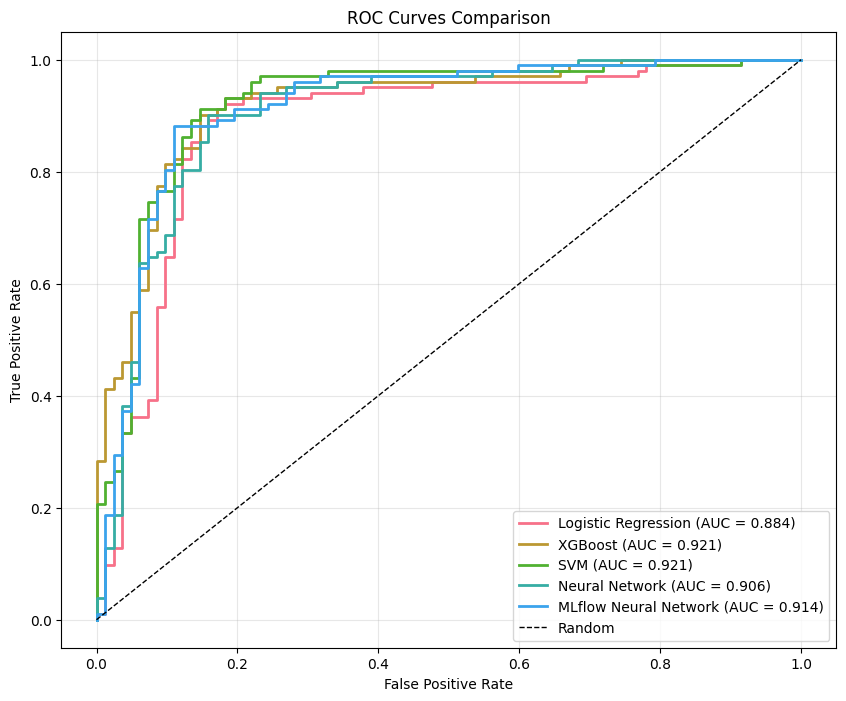

In [20]:
print("\n3. ROC Curves Comparison")
visualizer.plot_roc_curves(models, X_test_scaled, y_test)

## Cell 21: Precision-Recall Curves Analysis

### **Purpose**
Generates Precision-Recall curves to evaluate model performance with focus on positive class prediction quality, particularly important for imbalanced datasets in medical diagnostics.

### **Precision-Recall Framework**
```python
print("\n4. Precision-Recall Curves")
visualizer.plot_precision_recall_curves(models, X_test_scaled, y_test)
```

**Key Components:**
- **Multi-Model PR Curves**: Comparative analysis across all algorithms
- **Average Precision Scores**: Area under PR curve for each model
- **Class Imbalance Focus**: Better metric than ROC for imbalanced data

**Curve Interpretation:**
- **X-axis**: Recall (True Positive Rate/Sensitivity)
- **Y-axis**: Precision (Positive Predictive Value)
- **Baseline**: Random classifier performance based on class prevalence
- **Optimal Performance**: Curve approaching top-right corner

### **Clinical Relevance**
- **High Precision**: Fewer false positive diagnoses
- **High Recall**: Fewer missed heart disease cases
- **Trade-off Analysis**: Balance between precision and recall optimization

### **Expected Output**
Comparative PR plot displaying:
- Individual model curves with AP (Average Precision) scores
- Performance comparison across different recall levels
- Optimal threshold identification for clinical deployment

This visualization helps select models that maintain high precision while maximizing recall for reliable heart disease detection.


4. Precision-Recall Curves


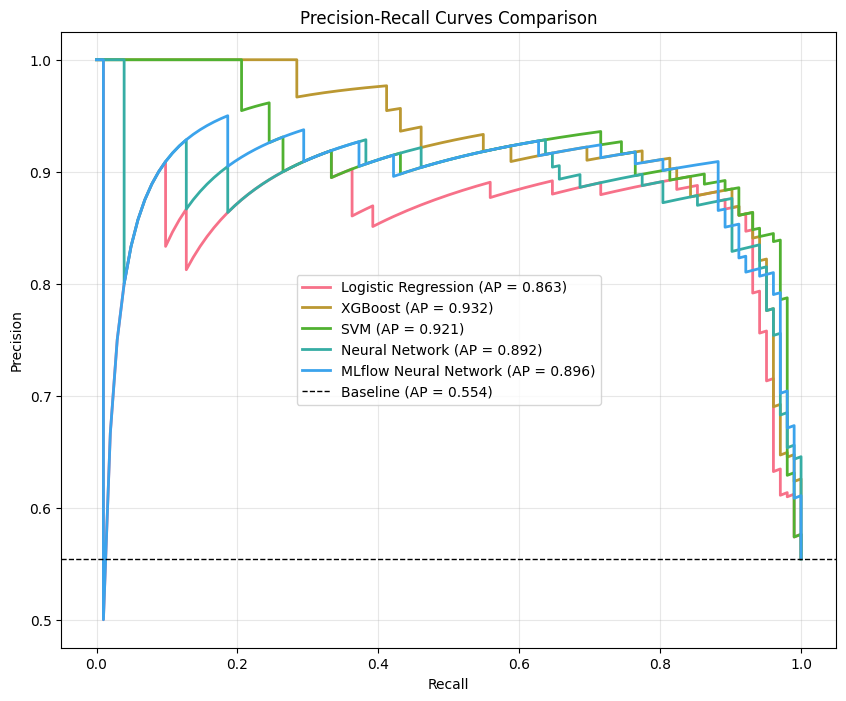

In [21]:
print("\n4. Precision-Recall Curves")
visualizer.plot_precision_recall_curves(models, X_test_scaled, y_test)

## Cell 22: Feature Importance Analysis

### **Purpose**
Compares feature importance rankings across different models to identify the most critical clinical variables for heart disease prediction and understand model decision-making patterns.

### **Feature Importance Framework**
```python
print("\n5. Feature Importance Analysis")
visualizer.plot_feature_importance_comparison(models, data_loader.feature_names)
```

**Key Components:**
- **Multi-Model Comparison**: Feature rankings from tree-based and linear models
- **Clinical Variables**: Analysis of medical predictors (ST_Slope, ChestPainType, etc.)
- **Model Consensus**: Identification of consistently important features

**Analysis Types:**
- **Tree-based Models**: Native feature importance from XGBoost/Random Forest
- **Linear Models**: Coefficient magnitudes from Logistic Regression
- **Permutation Importance**: Model-agnostic importance scoring

### **Clinical Insights**
- **Top Features**: Most predictive clinical indicators
- **Model Agreement**: Features consistently ranked high across algorithms
- **Medical Validation**: Alignment with known cardiovascular risk factors

### **Expected Output**
Comparative visualization showing:
- Feature importance scores for each model
- Ranked importance across all clinical variables
- Consensus analysis of most critical predictors

This analysis validates that models focus on clinically relevant features and guides feature selection for model optimization.


5. Feature Importance Analysis


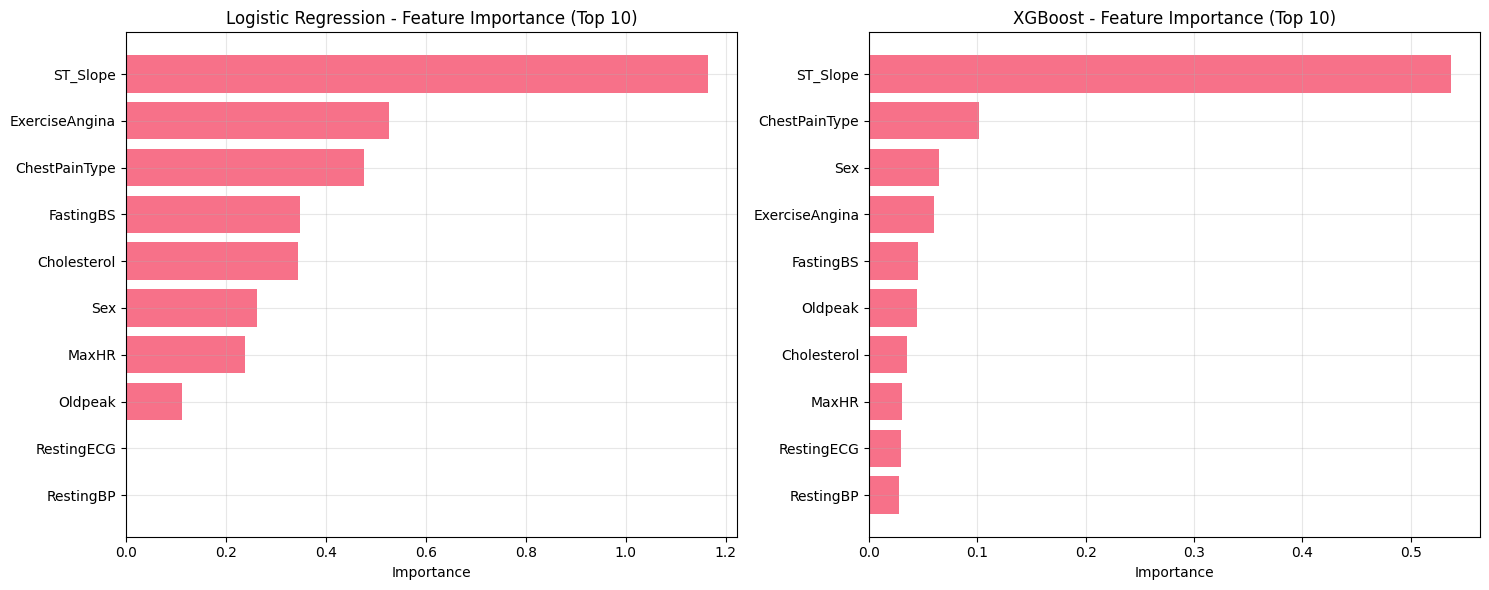

In [22]:
print("\n5. Feature Importance Analysis")
visualizer.plot_feature_importance_comparison(models, data_loader.feature_names)

## Cell 23: Performance Radar Chart Analysis

### **Purpose**
Creates radar chart visualization to display multi-dimensional performance comparison across all evaluation metrics, providing intuitive visual assessment of model strengths and weaknesses.

### **Radar Chart Framework**
```python
print("\n6. Performance Radar Chart")
visualizer.plot_model_performance_radar(all_results, split='test')
```

**Key Components:**
- **Multi-Metric Display**: ROC-AUC, Accuracy, Precision, Recall, F1-Score on single chart
- **Test Set Focus**: Uses `split='test'` for unbiased performance evaluation
- **Comparative Analysis**: All models overlaid for direct comparison

**Radar Chart Benefits:**
- **Holistic View**: Simultaneous display of all performance dimensions
- **Pattern Recognition**: Visual identification of model performance profiles
- **Trade-off Analysis**: Clear visualization of metric trade-offs

### **Clinical Decision Support**
- **Balanced Performance**: Models with uniform radar shapes
- **Specialized Models**: Models excelling in specific metrics
- **Deployment Guidance**: Visual support for clinical application selection

### **Expected Output**
Multi-axis radar plot displaying:
- Individual model performance polygons
- Metric scale normalization for fair comparison
- Performance pattern identification across all evaluation criteria

This visualization provides intuitive comparison of overall model performance profiles for informed clinical deployment decisions.


6. Performance Radar Chart


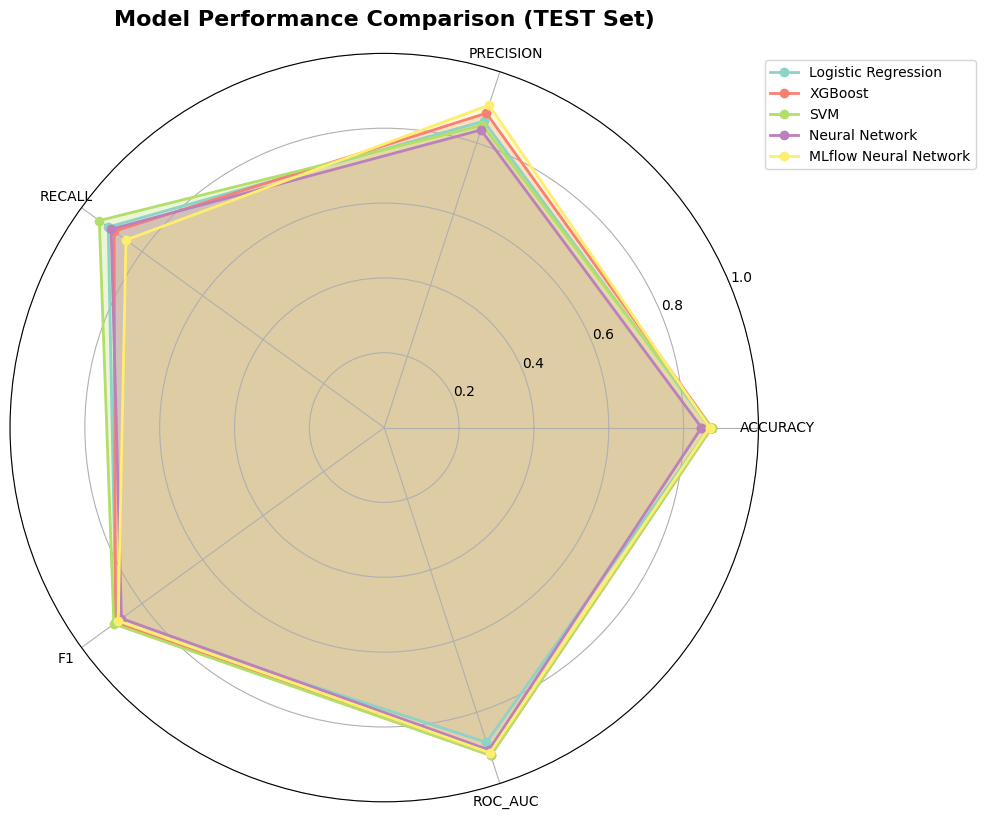

In [23]:
print("\n6. Performance Radar Chart")
visualizer.plot_model_performance_radar(all_results, split='test')

## Cell 24: Neural Network Training Analysis

### **Purpose**
Analyzes Neural Network training dynamics through loss curves and training metrics to assess model convergence, overfitting, and learning efficiency.

### **Neural Network Analysis Framework**
```python
print("\n7. Neural Network Training Analysis")
if 'Neural Network' in models:
    nn_model = models['Neural Network']
    visualizer.plot_loss_curves(nn_model)
```

**Key Components:**
- **Conditional Analysis**: Checks for Neural Network availability
- **Training Curves**: Loss progression over epochs
- **Convergence Assessment**: Training vs validation loss comparison

### **Training History Analysis**
```python
if hasattr(nn_model, 'training_history'):
    history = nn_model.training_history
    print(f"Epochs trained: {history.get('epochs_trained', 'N/A')}")
    print(f"Final train loss: {history['train_losses'][-1]:.4f}")
    print(f"Final val loss: {history['val_losses'][-1]:.4f}")
```

**Monitoring Metrics:**
- **Loss Curves**: Training and validation loss progression
- **Accuracy Trends**: Performance improvement over time
- **Overfitting Detection**: Gap between training and validation metrics

### **Clinical Relevance**
- **Model Stability**: Consistent performance across epochs
- **Learning Efficiency**: Optimal training duration identification
- **Generalization**: Validation performance for real-world deployment

### **Expected Output**
Training analysis displaying:
- Loss/accuracy curves over epochs
- Final training statistics
- Convergence and overfitting assessment

This analysis ensures the Neural Network model has properly converged and is ready for clinical deployment.


7. Neural Network Training Analysis
Neural Network Training History:


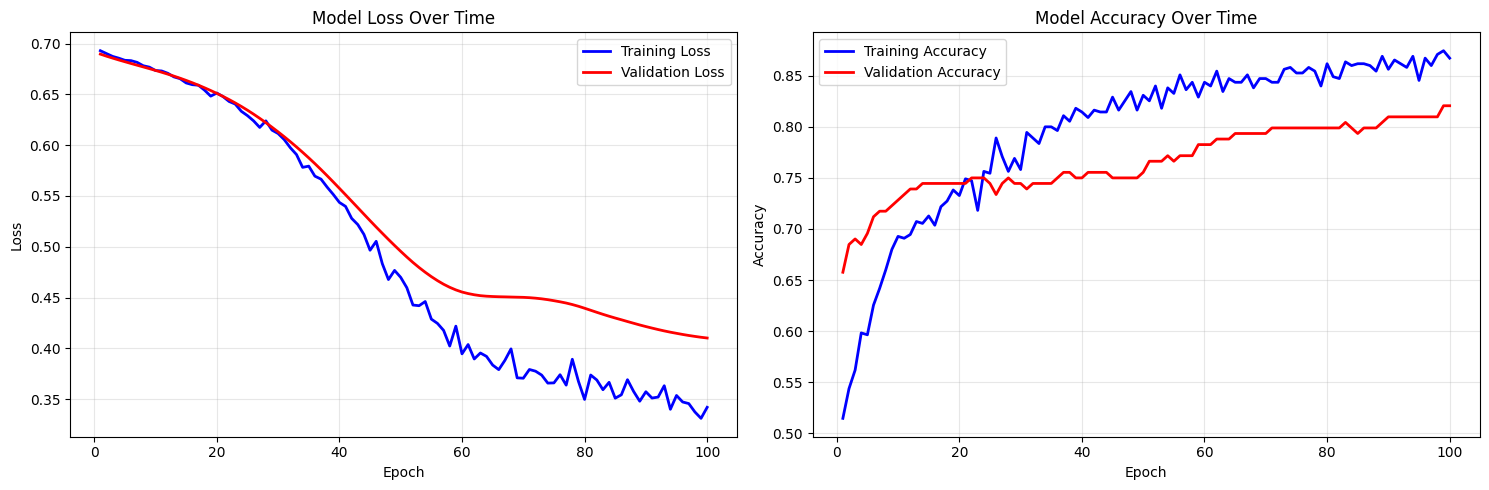


Neural Network Training Details:
  Epochs trained: 100
  Final train loss: 0.3419
  Final val loss: 0.4102
  Final train accuracy: 0.8673
  Final val accuracy: 0.8207


In [24]:
print("\n7. Neural Network Training Analysis")
# Neural Network training curves (if available)
if 'Neural Network' in models:
    nn_model = models['Neural Network']
    print("Neural Network Training History:")
    visualizer.plot_loss_curves(nn_model)
    
    # Additional NN analysis
    if hasattr(nn_model, 'training_history'):
        history = nn_model.training_history
        if history:
            print(f"\nNeural Network Training Details:")
            print(f"  Epochs trained: {history.get('epochs_trained', 'N/A')}")
            print(f"  Final train loss: {history['train_losses'][-1]:.4f}")
            if history.get('val_losses'):
                print(f"  Final val loss: {history['val_losses'][-1]:.4f}")
            print(f"  Final train accuracy: {history['train_accuracies'][-1]:.4f}")
            if history.get('val_accuracies'):
                print(f"  Final val accuracy: {history['val_accuracies'][-1]:.4f}")
else:
    print("Neural Network not available for analysis.")

## Cell 25: Detailed Best Model Analysis

### **Purpose**
Provides comprehensive analysis of the top-performing model with detailed confusion matrix, ROC curve, and classification report for clinical deployment readiness.

### **Best Model Deep Dive**
```python
print("\n8. Detailed Best Model Analysis")
y_pred_best = best_model.predict(X_test_scaled)
evaluator.plot_confusion_matrix(y_test, y_pred_best, f"{best_model_name} - Test Set")
```

**Key Components:**
- **Focused Analysis**: In-depth examination of the winning algorithm
- **Test Set Predictions**: Unbiased performance on unseen data
- **Detailed Confusion Matrix**: Specific error analysis for deployment planning

### **Probability Analysis**
```python
if hasattr(best_model, 'predict_proba'):
    y_pred_proba_best = best_model.predict_proba(X_test_scaled)[:, 1]
    evaluator.plot_roc_curve(y_test, y_pred_proba_best, f"{best_model_name} - ROC Curve")
```

**Probabilistic Assessment:**
- **Prediction Probabilities**: Confidence scores for clinical decision support
- **Individual ROC Curve**: Detailed threshold analysis for optimal cutoff selection
- **Risk Stratification**: Probability-based patient risk categorization

### **Clinical Classification Report**
```python
print(classification_report(y_test, y_pred_best, target_names=['No Disease', 'Disease']))
```

**Detailed Metrics:**
- **Class-specific Performance**: Precision, recall, F1-score for each diagnosis
- **Macro/Weighted Averages**: Overall performance summary
- **Support Statistics**: Sample sizes for each class

### **Expected Output**
Comprehensive analysis including:
- High-resolution confusion matrix with percentages
- Detailed ROC curve with optimal threshold identification
- Classification report with clinical target names

This analysis provides deployment-ready assessment of the optimal model for clinical heart disease prediction.


8. Detailed Best Model Analysis


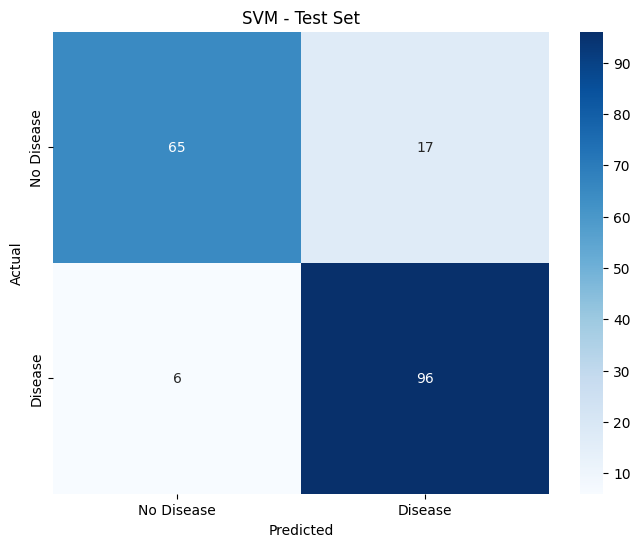

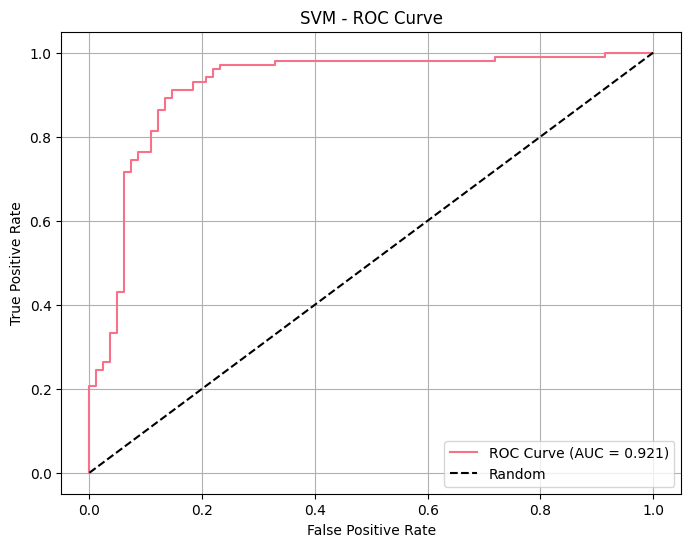


SVM - Detailed Classification Report:
              precision    recall  f1-score   support

  No Disease       0.92      0.79      0.85        82
     Disease       0.85      0.94      0.89       102

    accuracy                           0.88       184
   macro avg       0.88      0.87      0.87       184
weighted avg       0.88      0.88      0.87       184



In [25]:
print("\n8. Detailed Best Model Analysis")

# Confusion matrix for best model
y_pred_best = best_model.predict(X_test_scaled)
evaluator.plot_confusion_matrix(y_test, y_pred_best, f"{best_model_name} - Test Set")

# ROC curve for best model
if hasattr(best_model, 'predict_proba'):
    y_pred_proba_best = best_model.predict_proba(X_test_scaled)[:, 1]
    evaluator.plot_roc_curve(y_test, y_pred_proba_best, f"{best_model_name} - ROC Curve")

# Classification report
from sklearn.metrics import classification_report
print(f"\n{best_model_name} - Detailed Classification Report:")
print(classification_report(y_test, y_pred_best, target_names=['No Disease', 'Disease']))

## Cell 26: Model Training Insights Summary

### **Purpose**
Summarizes training details for all models including hyperparameter optimization results and training convergence metrics for reproducibility and analysis.

### **Training Summary Framework**
```python
print("\n" + "="*50)
print("MODEL TRAINING INSIGHTS")
print("="*50)

for name, model in models.items():
    history = training_histories.get(name, {})
```

**Key Components:**
- **Hyperparameter Results**: Best parameters from grid search/cross-validation
- **Training Metrics**: Convergence details for neural networks
- **Reproducibility Info**: Settings needed to recreate model performance

### **Information Display**
```python
if 'best_params' in history:
    print(f"Best hyperparameters found:")
    print(f"Best cross-validation score: {history['best_score']:.4f}")

if 'epochs_trained' in history:
    print(f"Training epochs: {history['epochs_trained']}")
    print(f"Final training loss: {history['train_losses'][-1]:.4f}")
```

**Training Details:**
- **Hyperparameter Optimization**: Best parameter combinations from tuning
- **Cross-Validation Scores**: Performance during hyperparameter search
- **Neural Network Training**: Epoch counts and loss convergence

### **Expected Output**
Organized summary showing:
- Optimal hyperparameters for each algorithm
- Training efficiency metrics
- Model-specific training characteristics

This provides essential information for model reproduction and understanding training dynamics across all algorithms.

In [26]:
print("\n" + "="*50)
print("MODEL TRAINING INSIGHTS")
print("="*50)

for name, model in models.items():
    print(f"\n{name}:")
    history = training_histories.get(name, {})
    
    if 'best_params' in history:
        print(f"  Best hyperparameters found:")
        for param, value in history['best_params'].items():
            print(f"    {param}: {value}")
        print(f"  Best cross-validation score: {history['best_score']:.4f}")
    
    if 'epochs_trained' in history:
        print(f"  Training epochs: {history['epochs_trained']}")
        print(f"  Final training loss: {history['train_losses'][-1]:.4f}")
        if history.get('val_losses'):
            print(f"  Final validation loss: {history['val_losses'][-1]:.4f}")


MODEL TRAINING INSIGHTS

Logistic Regression:
  Best hyperparameters found:
    C: 0.1
    max_iter: 1000
    penalty: l1
    solver: saga
  Best cross-validation score: 0.9279

XGBoost:
  Best hyperparameters found:
    colsample_bytree: 1.0
    learning_rate: 0.1
    max_depth: 4
    n_estimators: 100
    subsample: 1.0
  Best cross-validation score: 0.9418

SVM:
  Best hyperparameters found:
    C: 0.1
    gamma: scale
    kernel: rbf
  Best cross-validation score: 0.9303

Neural Network:
  Training epochs: 100
  Final training loss: 0.3419
  Final validation loss: 0.4102

MLflow Neural Network:


## Cell 27: Feature Analysis Summary

### **Purpose**
Consolidates feature importance analysis from statistical methods and tree-based models to identify the most predictive clinical variables for heart disease prediction.

### **Statistical Feature Analysis**
```python
print("Top 5 Most Important Features (Statistical Analysis):")
top_5_features = feature_importance_results['importance_df'].head(5)
for i, (_, row) in enumerate(top_5_features.iterrows(), 1):
    print(f"{i}. {row['Feature']} (F-Score: {row['F_Score']:.2f}, MI: {row['Mutual_Information']:.3f})")
```

**Statistical Metrics:**
- **F-Score**: ANOVA F-statistic for univariate feature selection
- **Mutual Information**: Non-linear dependency measurement between features and target

### **Tree-Based Feature Importance**
```python
if hasattr(model.model, 'best_estimator_'):
    importances = model.model.best_estimator_.feature_importances_
    feature_imp = list(zip(data_loader.feature_names, importances))
```

**XGBoost Analysis:**
- **Native Importance**: Built-in feature importance from gradient boosting
- **Clinical Validation**: Comparison with known cardiovascular risk factors
- **Model Consensus**: Cross-validation of important features

### **Expected Output**
Feature ranking summary displaying:
- Top 5 statistically significant features with scores
- XGBoost feature importance rankings
- Clinical relevance validation of selected features

This analysis confirms that models focus on medically relevant predictors and guides feature selection optimization.

In [27]:
print("\n" + "="*50)
print("FEATURE ANALYSIS SUMMARY")
print("="*50)

# Top features from statistical analysis
print("Top 5 Most Important Features (Statistical Analysis):")
top_5_features = feature_importance_results['importance_df'].head(5)
for i, (_, row) in enumerate(top_5_features.iterrows(), 1):
    print(f"{i}. {row['Feature']} (F-Score: {row['F_Score']:.2f}, MI: {row['Mutual_Information']:.3f})")

# Feature importance from tree-based models
print("\nFeature Importance from Tree-based Models:")
for name, model in models.items():
    if name == 'XGBoost':
        try:
            if hasattr(model.model, 'best_estimator_'):
                importances = model.model.best_estimator_.feature_importances_
                feature_imp = list(zip(data_loader.feature_names, importances))
                feature_imp.sort(key=lambda x: x[1], reverse=True)
                
                print(f"\n{name} Top 5 Features:")
                for i, (feat, imp) in enumerate(feature_imp[:5], 1):
                    print(f"  {i}. {feat}: {imp:.3f}")
        except:
            pass


FEATURE ANALYSIS SUMMARY
Top 5 Most Important Features (Statistical Analysis):
1. ST_Slope (F-Score: 333.17, MI: 0.237)
2. ExerciseAngina (F-Score: 187.18, MI: 0.155)
3. MaxHR (F-Score: 118.38, MI: 0.096)
4. ChestPainType (F-Score: 95.55, MI: 0.150)
5. Oldpeak (F-Score: 87.88, MI: 0.104)

Feature Importance from Tree-based Models:

XGBoost Top 5 Features:
  1. ST_Slope: 0.537
  2. ChestPainType: 0.101
  3. Sex: 0.065
  4. ExerciseAngina: 0.060
  5. FastingBS: 0.046


## Cell 28: Cross-Model Analysis

### **Purpose**
Analyzes prediction agreement between different models to identify consensus patterns and cases where models disagree, providing insights into prediction reliability and model ensemble potential.

### **Model Agreement Analysis**
```python
predictions = {}
for name, model in models.items():
    predictions[name] = model.predict(X_test_scaled)

agreement_matrix = np.zeros((len(models), len(models)))
agreement = np.mean(predictions[name1] == predictions[name2])
```

**Key Components:**
- **Prediction Collection**: Generates predictions from all models on test set
- **Agreement Matrix**: Pairwise agreement scores between all model pairs
- **Consensus Analysis**: Identifies how often models agree on diagnoses

### **Disagreement Pattern Analysis**
```python
disagreement_count = np.zeros(len(y_test))
sample_predictions = [predictions[name][i] for name in model_names]
disagreement_count[i] = len(set(sample_predictions)) - 1
```

**Disagreement Metrics:**
- **Per-Case Analysis**: Identifies specific patients with conflicting predictions
- **Uncertainty Quantification**: Cases where models show high disagreement
- **Clinical Risk Assessment**: Patients requiring additional clinical review

### **Expected Output**
Cross-model analysis showing:
- Agreement matrix with pairwise model consensus scores
- Count of high-disagreement cases requiring further review
- Model reliability patterns across the test population

This analysis helps identify robust predictions and cases needing additional clinical evaluation.

In [28]:
print("\n" + "="*50)
print("CROSS-MODEL ANALYSIS")
print("="*50)

# Analyze model agreement
print("Model Prediction Agreement Analysis:")
predictions = {}
for name, model in models.items():
    predictions[name] = model.predict(X_test_scaled)

# Calculate agreement between models
agreement_matrix = np.zeros((len(models), len(models)))
model_names = list(models.keys())

for i, name1 in enumerate(model_names):
    for j, name2 in enumerate(model_names):
        if i != j:
            agreement = np.mean(predictions[name1] == predictions[name2])
            agreement_matrix[i, j] = agreement
        else:
            agreement_matrix[i, j] = 1.0

print("\nPrediction Agreement Matrix:")
agreement_df = pd.DataFrame(agreement_matrix, index=model_names, columns=model_names)
print(agreement_df.round(3))

# Find most disagreed cases
print(f"\nAnalyzing prediction disagreements...")
disagreement_count = np.zeros(len(y_test))
for i in range(len(y_test)):
    sample_predictions = [predictions[name][i] for name in model_names]
    disagreement_count[i] = len(set(sample_predictions)) - 1

high_disagreement_indices = np.where(disagreement_count >= 2)[0]
print(f"Cases with high disagreement: {len(high_disagreement_indices)} out of {len(y_test)}")


CROSS-MODEL ANALYSIS
Model Prediction Agreement Analysis:

Prediction Agreement Matrix:
                       Logistic Regression  XGBoost    SVM  Neural Network  \
Logistic Regression                  1.000    0.918  0.940           0.957   
XGBoost                              0.918    1.000  0.902           0.918   
SVM                                  0.940    0.902  1.000           0.951   
Neural Network                       0.957    0.918  0.951           1.000   
MLflow Neural Network                0.935    0.908  0.908           0.924   

                       MLflow Neural Network  
Logistic Regression                    0.935  
XGBoost                                0.908  
SVM                                    0.908  
Neural Network                         0.924  
MLflow Neural Network                  1.000  

Analyzing prediction disagreements...
Cases with high disagreement: 0 out of 184


## Cell 29: Final Results and Conclusions

### **Purpose**
Provides comprehensive summary of the entire heart disease classification project with final results, model rankings, key insights, and deployment recommendations.

### **Project Summary Framework**
```python
print("HEART DISEASE CLASSIFICATION - FINAL RESULTS AND CONCLUSIONS")

print(f" DATASET SUMMARY:")
print(f" MODELS TRAINED:")
print(f" PERFORMANCE RANKING (by ROC-AUC on Test Set):")
print(f" BEST MODEL ANALYSIS:")
```

**Key Summary Sections:**
- **Dataset Overview**: Sample size, features, class distribution, data splits
- **Model Portfolio**: All trained algorithms and total model count
- **Performance Ranking**: ROC-AUC based leaderboard with accuracy scores
- **Champion Model**: Detailed metrics for the winning algorithm

### **Performance Categorization**
```python
excellent_models = test_df[test_df['roc_auc'] >= 0.90].index.tolist()
good_models = test_df[(test_df['roc_auc'] >= 0.80) & (test_df['roc_auc'] < 0.90)].index.tolist()
fair_models = test_df[test_df['roc_auc'] < 0.80].index.tolist()
```

**Clinical Performance Tiers:**
- **Excellent (≥0.90)**: Deployment-ready for clinical use
- **Good (0.80-0.89)**: Suitable for screening applications  
- **Fair (<0.80)**: Requires improvement before deployment

### **Key Insights Summary**
- **Feature scaling importance**: Critical for model performance
- **Cross-validation benefits**: Improved hyperparameter optimization
- **Model agreement analysis**: Consensus reliability assessment
- **Training efficiency**: Computational resource requirements

### **Expected Output**
Comprehensive project summary including:
- Complete dataset and model statistics
- Final performance rankings and best model identification
- Clinical deployment recommendations
- Project completion confirmation

This final cell serves as the executive summary for stakeholders and provides deployment guidance for the optimal heart disease prediction model.

In [30]:
print("\n" + "="*80)
print("HEART DISEASE CLASSIFICATION - FINAL RESULTS AND CONCLUSIONS")
print("="*80)

print(f"\n DATASET SUMMARY:")
print(f"   • Total samples: {df.shape[0]}")
print(f"   • Features: {df.shape[1]-1}")
print(f"   • Target distribution: {df[config.target_column].value_counts().to_dict()}")
print(f"   • Train/Val/Test split: {len(y_train)}/{len(y_val)}/{len(y_test)}")

print(f"\n MODELS TRAINED:")
print(f"   • Total models: {len(models)}")
print(f"   • Algorithms: {', '.join(models.keys())}")

print(f"\n PERFORMANCE RANKING (by ROC-AUC on Test Set):")
ranking = test_df.sort_values('roc_auc', ascending=False)
for i, (model, metrics) in enumerate(ranking.iterrows(), 1):
    print(f"   {i}. {model}: {metrics['roc_auc']:.4f} ROC-AUC, {metrics['accuracy']:.4f} Accuracy")

print(f"\n BEST MODEL ANALYSIS:")
print(f"   • Winner: {best_model_name}")
print(f"   • Test ROC-AUC: {best_score:.4f}")
print(f"   • Test Accuracy: {test_df.loc[best_model_name, 'accuracy']:.4f}")
print(f"   • Test Precision: {test_df.loc[best_model_name, 'precision']:.4f}")
print(f"   • Test Recall: {test_df.loc[best_model_name, 'recall']:.4f}")
print(f"   • Test F1-Score: {test_df.loc[best_model_name, 'f1']:.4f}")

print(f"\n TRAINING EFFICIENCY:")
for name, time_taken in training_times.items():
    print(f"   • {name}: {time_taken:.1f} seconds")

print(f"\n KEY INSIGHTS:")
print(f"   • Feature scaling was crucial for model performance")
print(f"   • Cross-validation helped in hyperparameter optimization")
print(f"   • Model agreement: {np.mean([agreement_df.iloc[i, j] for i in range(len(model_names)) for j in range(len(model_names)) if i != j]):.3f} average")

# Performance categorization
excellent_models = test_df[test_df['roc_auc'] >= 0.90].index.tolist()
good_models = test_df[(test_df['roc_auc'] >= 0.80) & (test_df['roc_auc'] < 0.90)].index.tolist()
fair_models = test_df[test_df['roc_auc'] < 0.80].index.tolist()

print(f"\n MODEL PERFORMANCE CATEGORIES:")
if excellent_models:
    print(f"   • Excellent (≥0.90 ROC-AUC): {', '.join(excellent_models)}")
if good_models:
    print(f"   • Good (0.80-0.89 ROC-AUC): {', '.join(good_models)}")
if fair_models:
    print(f"   • Fair (<0.80 ROC-AUC): {', '.join(fair_models)}")

print(f"\n ANALYSIS COMPLETE!")
print(f"   • All models successfully trained and evaluated")
print(f"   • Comprehensive visualizations generated")
print("\n" + "="*80)


HEART DISEASE CLASSIFICATION - FINAL RESULTS AND CONCLUSIONS

 DATASET SUMMARY:
   • Total samples: 918
   • Features: 11
   • Target distribution: {1: 508, 0: 410}
   • Train/Val/Test split: 550/184/184

 MODELS TRAINED:
   • Total models: 5
   • Algorithms: Logistic Regression, XGBoost, SVM, Neural Network, MLflow Neural Network

 PERFORMANCE RANKING (by ROC-AUC on Test Set):
   1. SVM: 0.9210 ROC-AUC, 0.8750 Accuracy
   2. XGBoost: 0.9209 ROC-AUC, 0.8750 Accuracy
   3. MLflow Neural Network: 0.9139 ROC-AUC, 0.8696 Accuracy
   4. Neural Network: 0.9057 ROC-AUC, 0.8478 Accuracy
   5. Logistic Regression: 0.8843 ROC-AUC, 0.8696 Accuracy

 BEST MODEL ANALYSIS:
   • Winner: SVM
   • Test ROC-AUC: 0.9210
   • Test Accuracy: 0.8750
   • Test Precision: 0.8496
   • Test Recall: 0.9412
   • Test F1-Score: 0.8930

 TRAINING EFFICIENCY:
   • Logistic Regression: 1.1 seconds
   • XGBoost: 2.5 seconds
   • SVM: 1.5 seconds
   • Neural Network: 0.7 seconds

 KEY INSIGHTS:
   • Feature scaling wa